In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
game_df = pd.read_csv('game.csv')
game_info_df = pd.read_csv('game_info.csv')
team_df = pd.read_csv('team.csv')
team_details_df = pd.read_csv('team_details.csv')

In [3]:
team_details_df.drop(['headcoach', 'twitter', 'instagram', 'facebook', 'yearfounded'], axis=1, inplace=True)

In [4]:
merged_df = pd.merge(game_df, game_info_df, on='game_id')
# Group the dataframe by 'team_id'
grouped = merged_df.groupby(['team_id_home'])
merged_df['game_date_x'] = pd.to_datetime(merged_df['game_date_x'])

# Calculate the time differences in days for the 'game_date_x' column
time_diff = grouped['game_date_x'].diff().dt.days
merged_df['days_off_home'] = time_diff.fillna(0)

# Group the dataframe by 'team_id'
grouped = merged_df.groupby(['team_id_away'])
merged_df['game_date_x'] = pd.to_datetime(merged_df['game_date_x'])

# Calculate the time differences in days for the 'game_date_x' column
time_diff = grouped['game_date_x'].diff().dt.days
merged_df['days_off_away'] = time_diff.fillna(0)

In [5]:
merged_df = pd.merge(merged_df, team_details_df, left_on='team_id_home', right_on='team_id')
merged_df['attend_density'] = merged_df['attendance'] / merged_df['arenacapacity']

In [6]:
# merged_df.drop(merged_df[merged_df['attend_density'] > 1].index, inplace=True)
# merged_df.drop(merged_df[merged_df['attend_density'] == 0].index, inplace=True)

In [7]:
merged_df = merged_df[merged_df['season_id'] >= 22009]
merged_df = merged_df[['days_off_home', 'days_off_away', 'attend_density', 'game_id']]

In [8]:
import datetime
game_merge_data = pd.read_csv('game_merged_data.csv')
game_merge_data = pd.merge(game_info_df, game_merge_data, on='game_id', how='left')
game_merge_data.drop('game_date_y', axis=1, inplace=True)
game_merge_data.rename(columns={'game_date_x': 'game_date'}, inplace=True)
game_merge_data = game_merge_data[game_merge_data['season_id'] >= 22009]
game_merge_data.drop('id_home', axis=1, inplace=True)
game_merge_data.drop('id_away', axis=1, inplace=True)
game_merge_data = game_merge_data.merge(team_details_df.add_suffix('_home'), left_on='team_id_home', right_on='team_id_home', suffixes=('', '_home'))
game_merge_data = game_merge_data.merge(team_details_df.add_suffix('_away'), left_on='team_id_away', right_on='team_id_away', suffixes=('', '_away'))
game_merge_data['season_id'] = game_merge_data['season_id'].astype(int)


# add is_covid column, from 3/1/2020 - 10/11/2020
game_merge_data['is_covid'] = 0
start_date = datetime.datetime(2020, 3, 1, 0, 0)
end_date = datetime.datetime(2020, 10, 11, 0, 0)
game_merge_data['game_date'] = pd.to_datetime(game_merge_data['game_date'])
game_merge_data.loc[(game_merge_data['game_date'] >= start_date) & (game_merge_data['game_date'] <= end_date), 'is_covid'] = 1
# game_merge_data.loc[(game_merge_data['game_date'] >= start_date) & (game_merge_data['game_date'] <= end_date), 'attendance'] = 0

# 使用 str.replace 方法将列名中的 "_home_home" 替换成 "_home"
game_merge_data.columns = game_merge_data.columns.str.replace('_home_home', '_home')

# 使用 str.replace 方法将列名中的 "_away_away" 替换成 "_home"
game_merge_data.columns = game_merge_data.columns.str.replace('_away_away', '_away')

# 使用 drop 方法删除重复列名
game_merge_data = game_merge_data.loc[:, ~game_merge_data.columns.duplicated()]

game_merge_data.drop(game_merge_data.filter(regex='Unnamed').columns, axis=1, inplace=True)
# game_merge_data.head()
game_merge_data = merged_df.merge(game_merge_data, on='game_id')
game_merge_data.drop('distance_y', axis=1, inplace=True)
game_merge_data.rename(columns={'distance_x': 'distance'}, inplace=True)
game_merge_data.head()

,days_off_home,days_off_away,attend_density,game_id,game_date,attendance,game_time,season_id,team_id_home,team_abbreviation_home,...,arenacapacity_home,owner_home,generalmanager_home,dleagueaffiliation_home,arena_away,arenacapacity_away,owner_away,generalmanager_away,dleagueaffiliation_away,is_covid
0,196.0,196.0,1.0,20900008,2009-10-28,18624.0,2:26,22009,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,Spectrum Center,19026,Michael Jordan,Mitch Kupchak,Greensboro Swarm,0
1,2.0,200.0,1.0,20900022,2009-10-30,18624.0,2:25,22009,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,United Center,21711,Jerry Reinsdorf,Arturas Karnisovas,Windy City Bulls,0
2,2.0,4.0,1.0,20900040,2009-11-01,18624.0,2:09,22009,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,Smoothie King Center,17791,Tom Benson,Trajan Langdon,Birmingham Squadron,0
3,5.0,2.0,1.0,20900076,2009-11-06,18624.0,2:20,22009,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,Footprint Center,18422,Mat Ishbia,James Jones,No Affiliate,0
4,5.0,2.0,1.0,20900111,2009-11-11,18624.0,2:09,22009,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,Vivint Arena,20000,Ryan Smith,Justin Zanik,Salt Lake City Stars,0


In [9]:
final_merged_data = game_merge_data.copy()

In [10]:
# final_merged_data = pd.merge(game_team_home, team_merged_data, left_on='team_id_away', right_on='team_id', suffixes=('_home', '_away'))
final_merged_data['home_advantage'] = (final_merged_data['wl_home'] == 'W').astype(int)

In [11]:
def convert_distance(distance_str):
    distance, unit = distance_str.split()
    distance = float(distance.replace(',', ''))
    if unit == 'km':
        return distance * 0.621371192
    if unit == 'ft':
        return distance * 0.000189393939
    return distance

final_merged_data['distance_mi'] = final_merged_data['distance'].apply(convert_distance)
final_merged_data['distance_mi'] = final_merged_data['distance_mi'].astype(int)

In [12]:
# 计算attendance team和attendance league
final_merged_data['attendance_team'] = final_merged_data.groupby(['season_id','team_id_home'])['attendance'].transform(lambda x: (x - x.mean()) / x.std())
final_merged_data['attendance_league'] = final_merged_data.groupby(['season_id'])['attendance'].transform(lambda x: (x - x.mean()) / x.std())

selected_columns = [
    'days_off_home', 'days_off_away', 'attend_density', 'game_id', 'game_date', 'attendance',
    'season_id', 'team_id_home', 'team_id_away', 'team_abbreviation_home', 'team_abbreviation_away',
    'team_name_home', 'team_name_away', 'wl_home', 'pts_home', 'pts_away', 'time_diff', 'distance_mi',
    'attendance_team', 'attendance_league', 'is_covid', 'attendance_team', 'attendance_league'
]

fit_dataset = final_merged_data[selected_columns]
# fit_dataset.head()


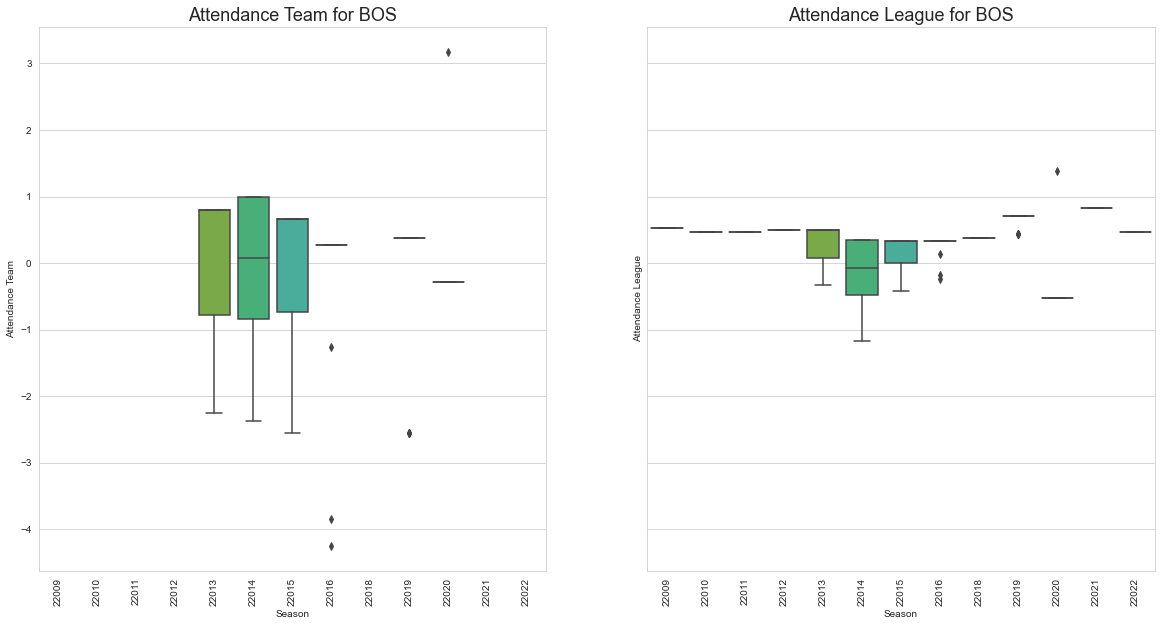

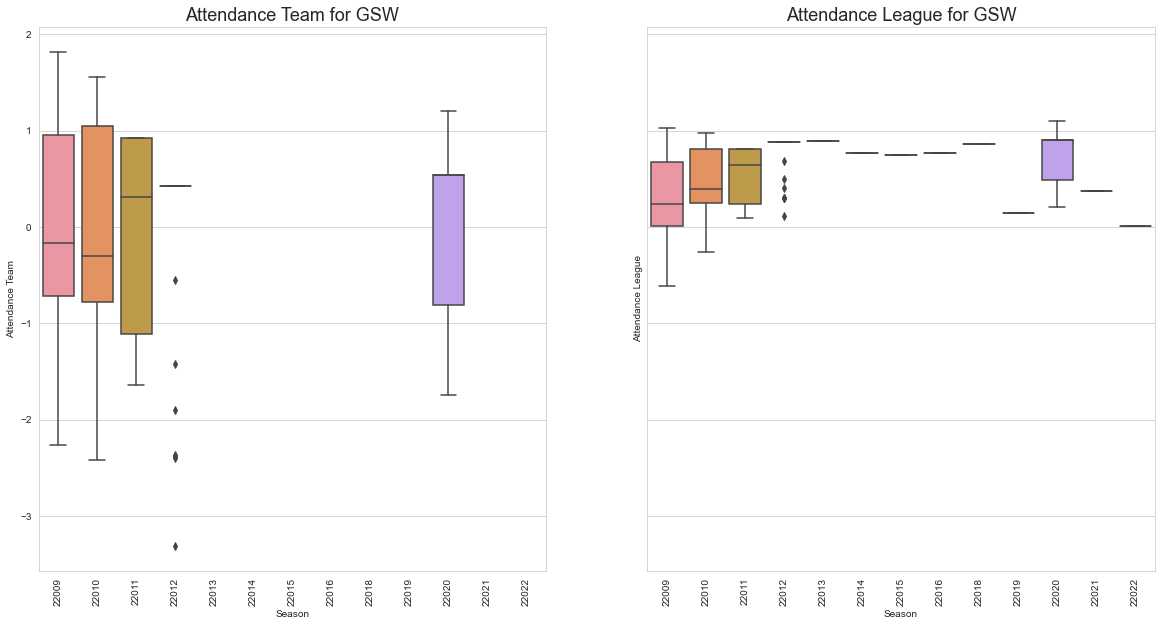

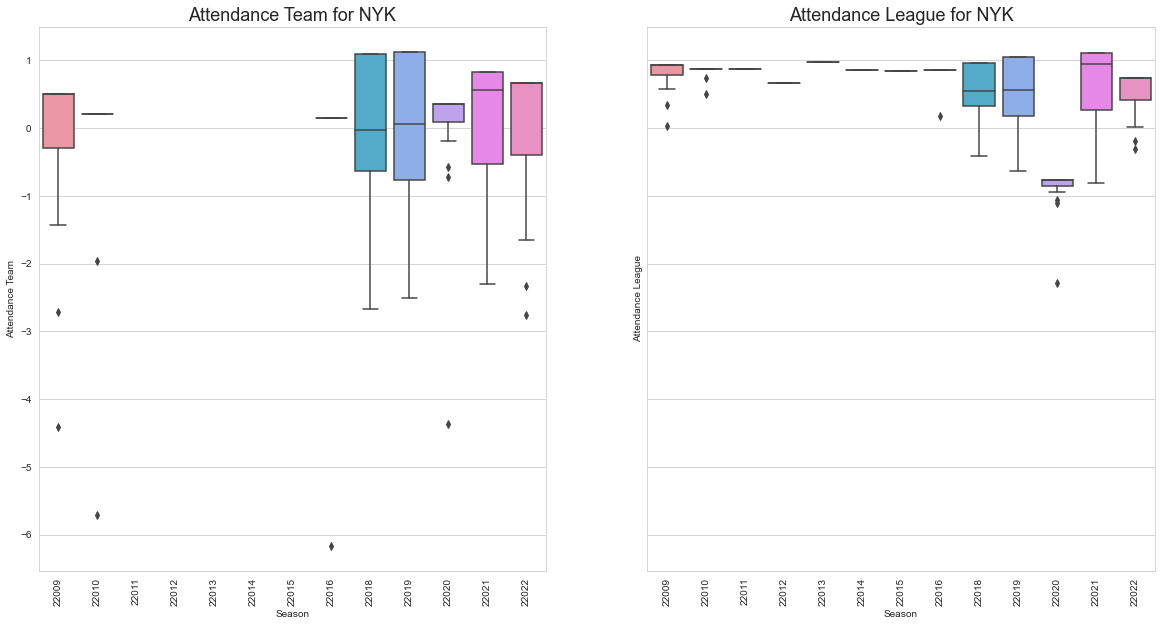

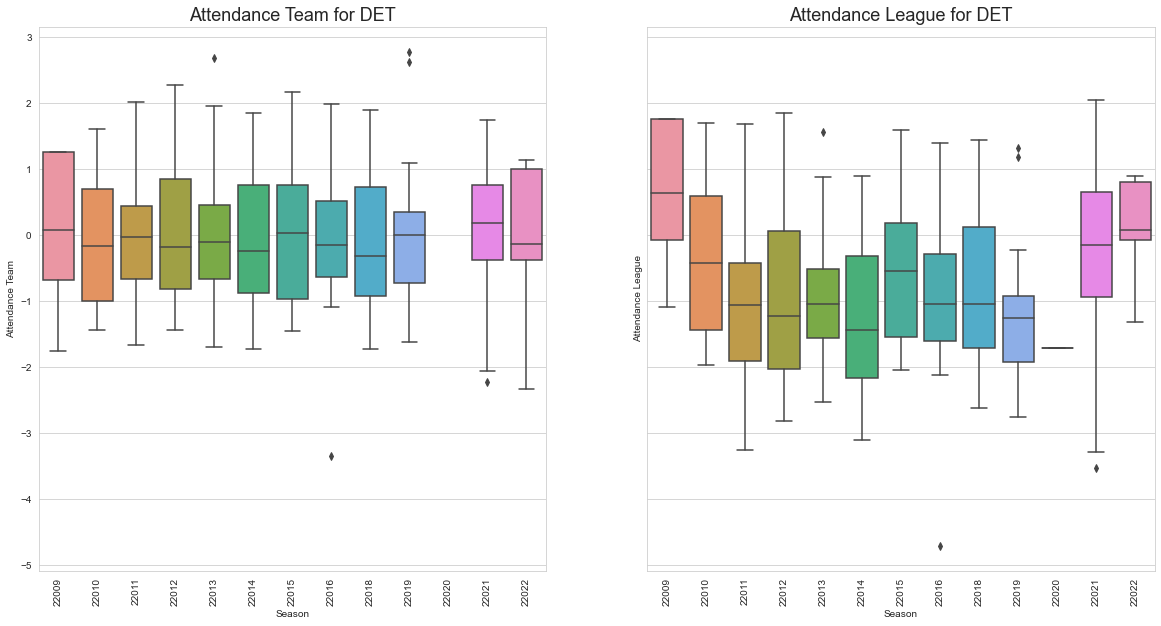

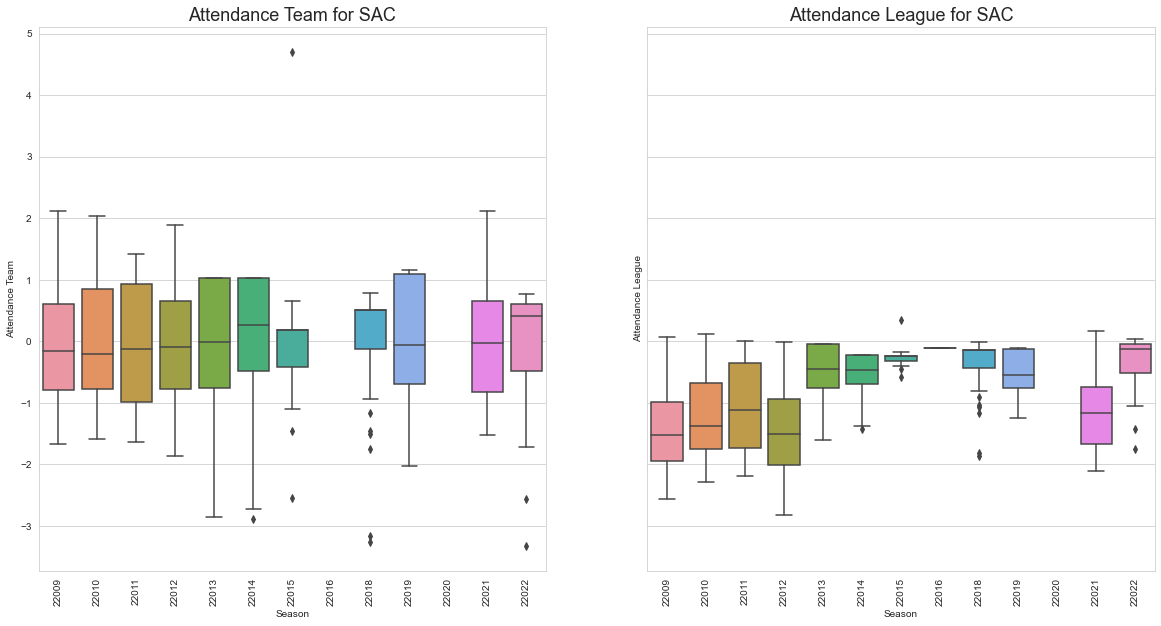

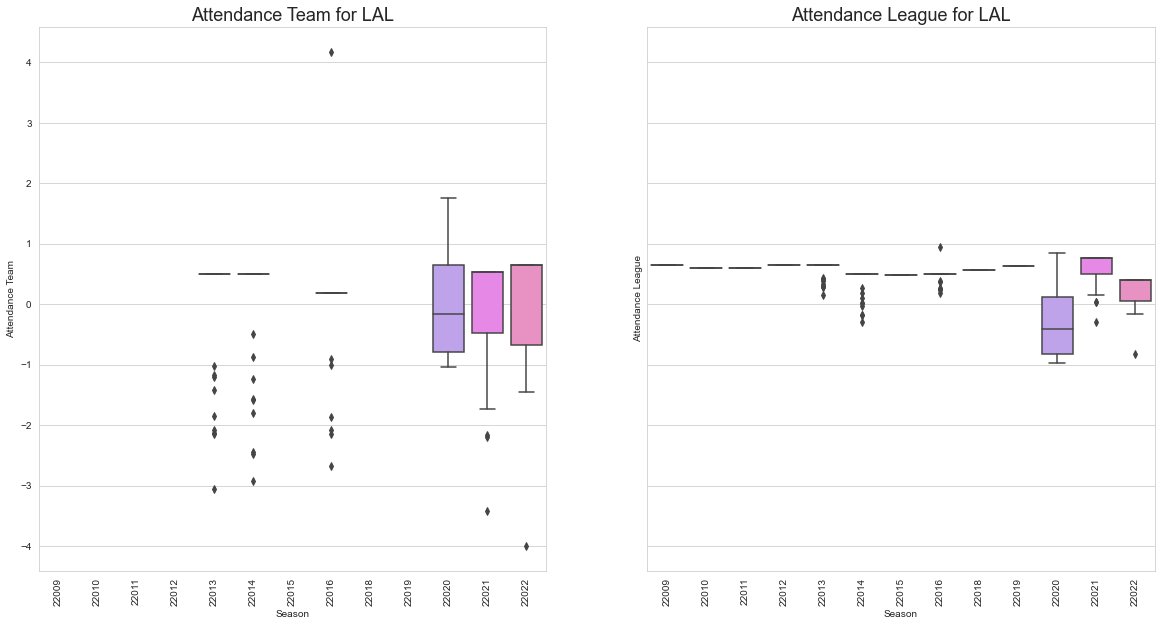

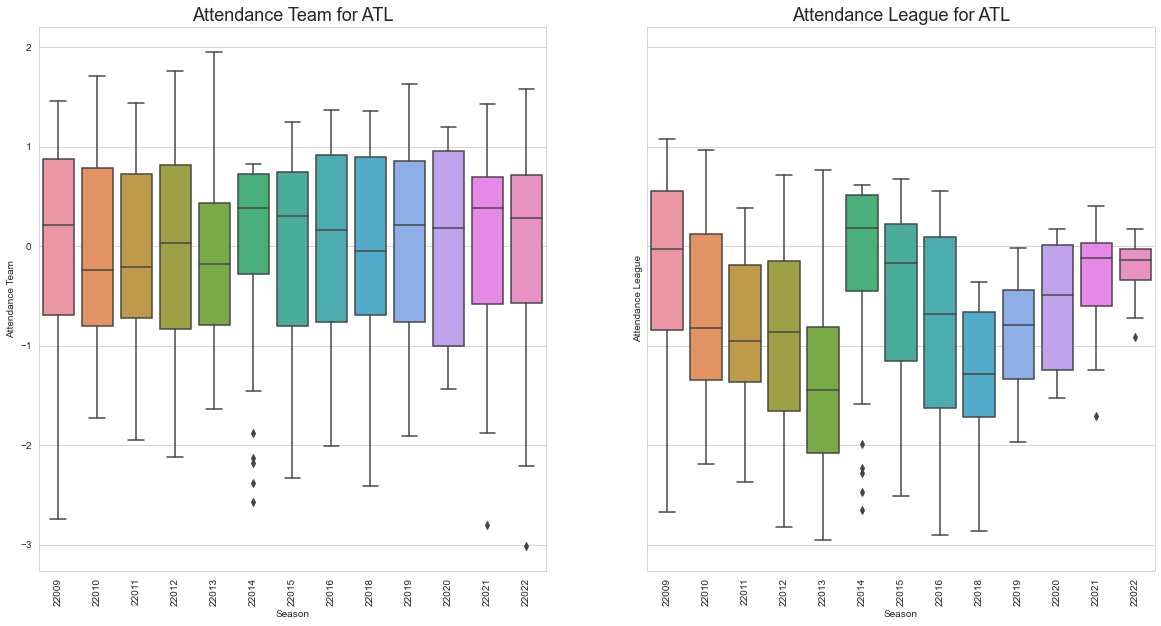

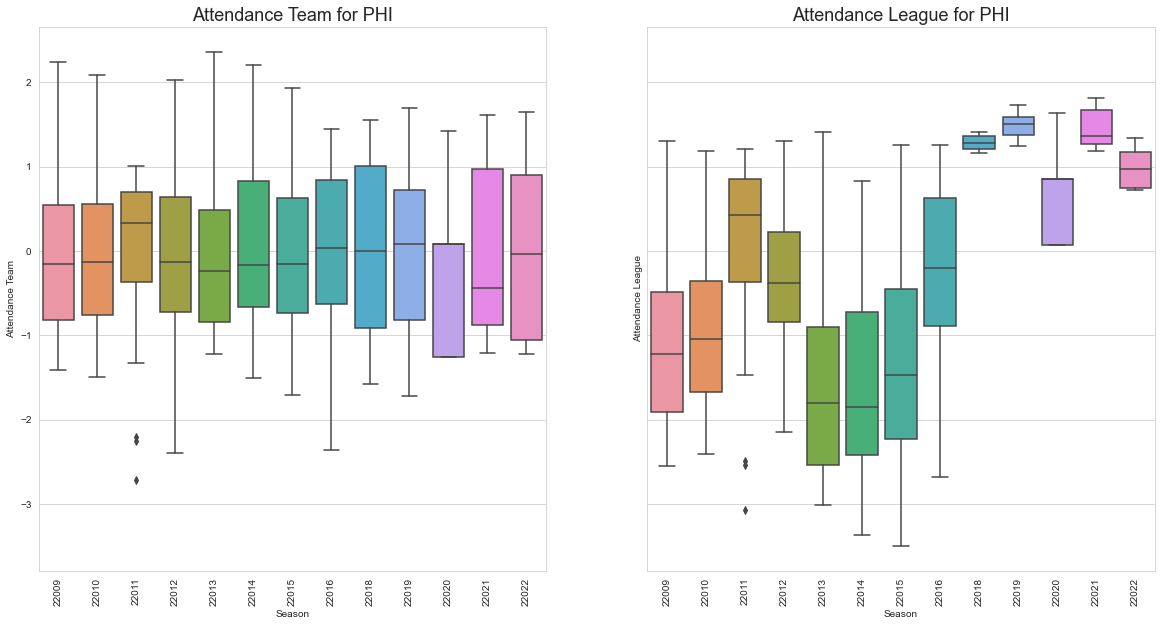

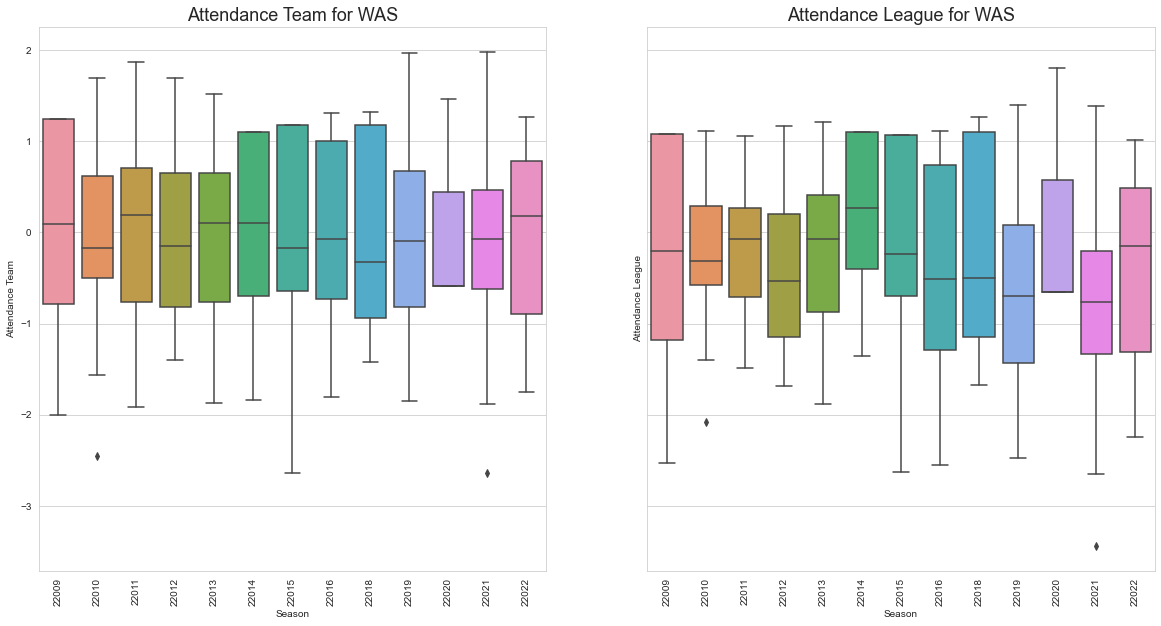

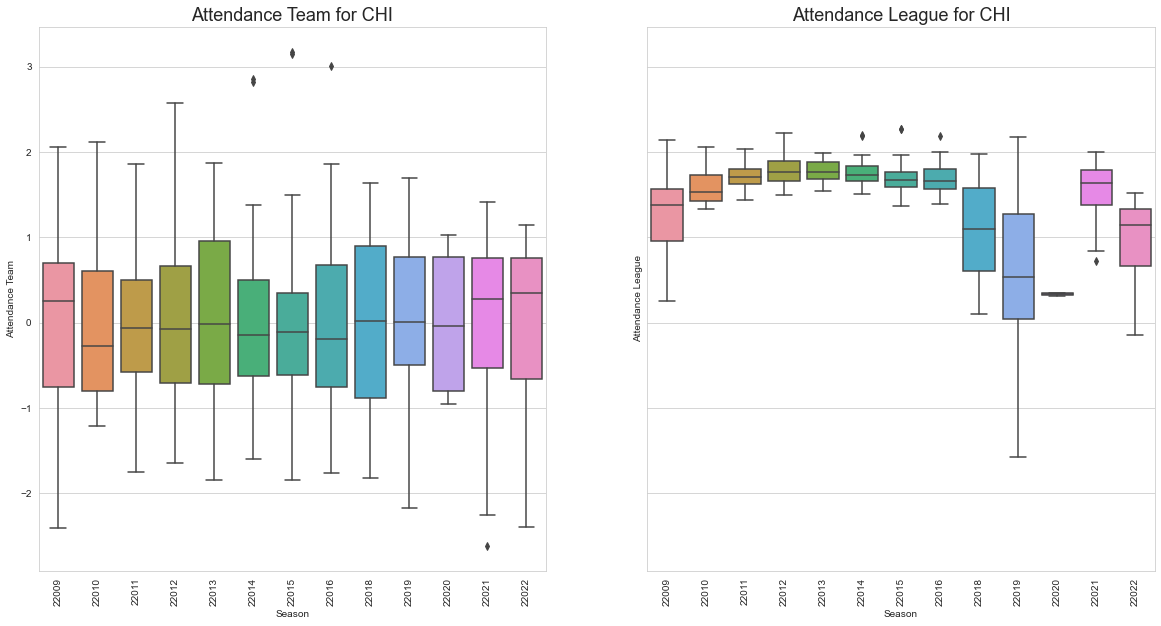

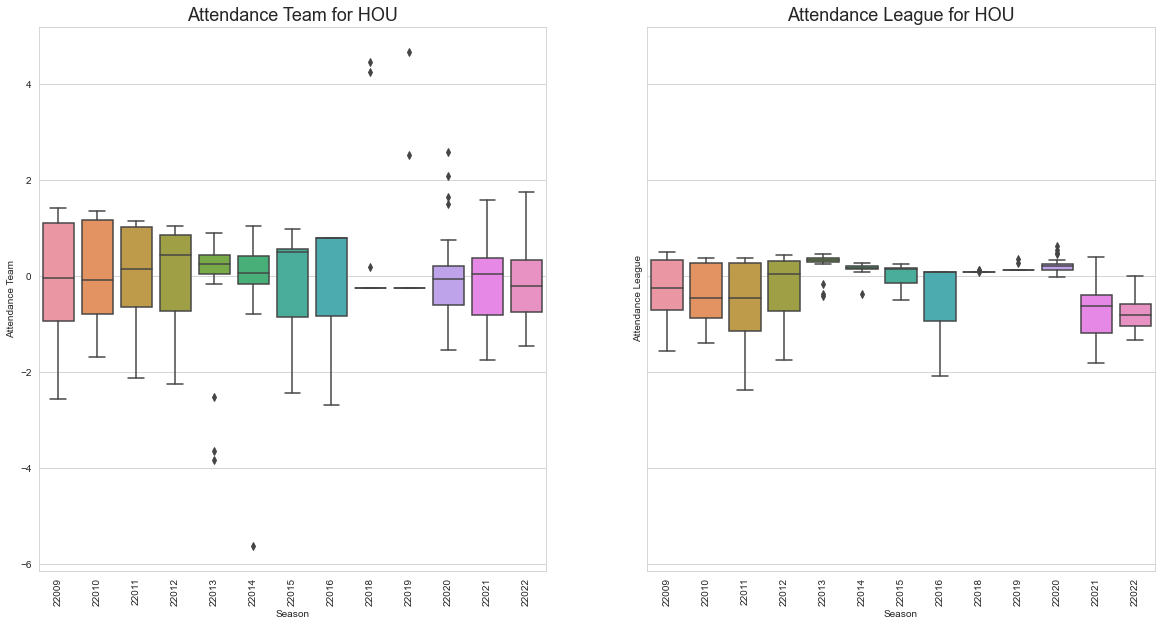

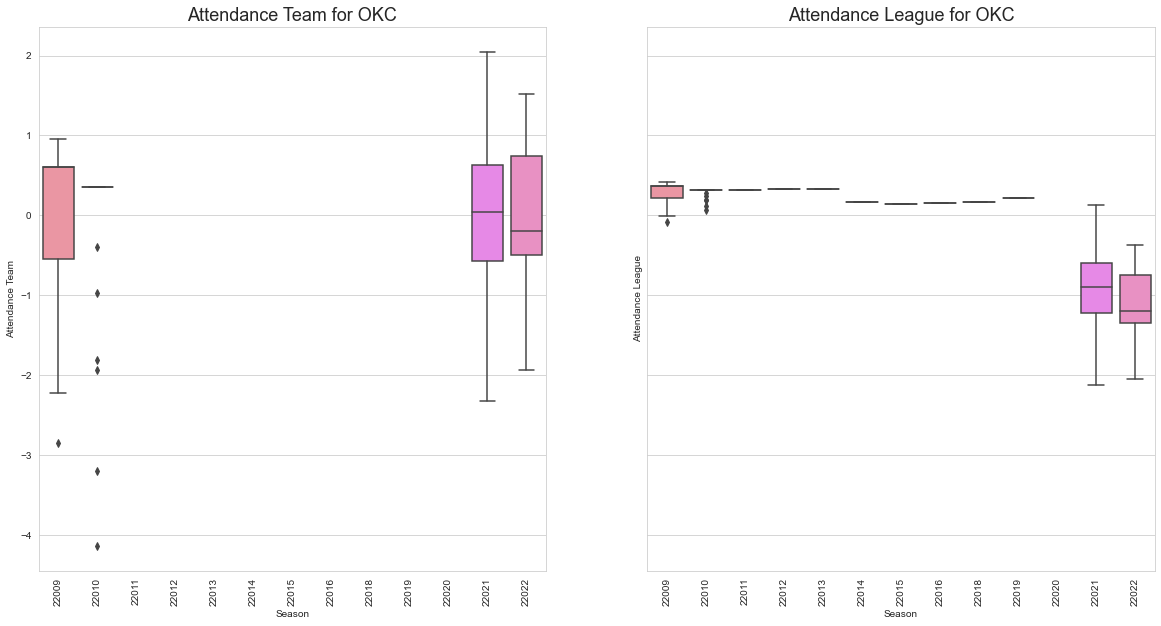

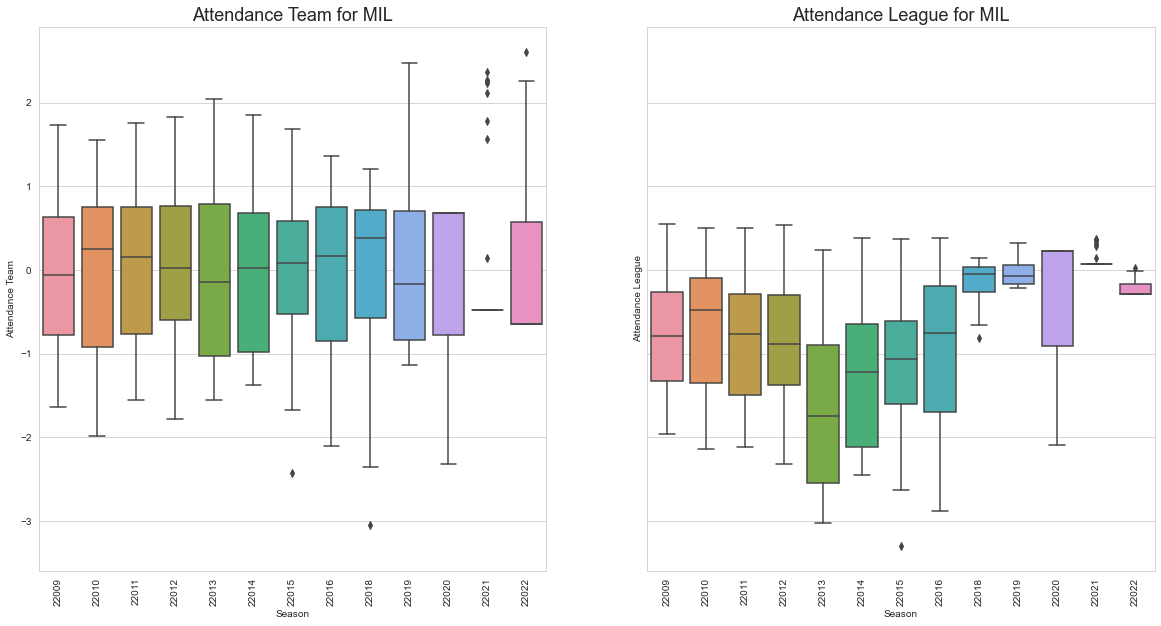

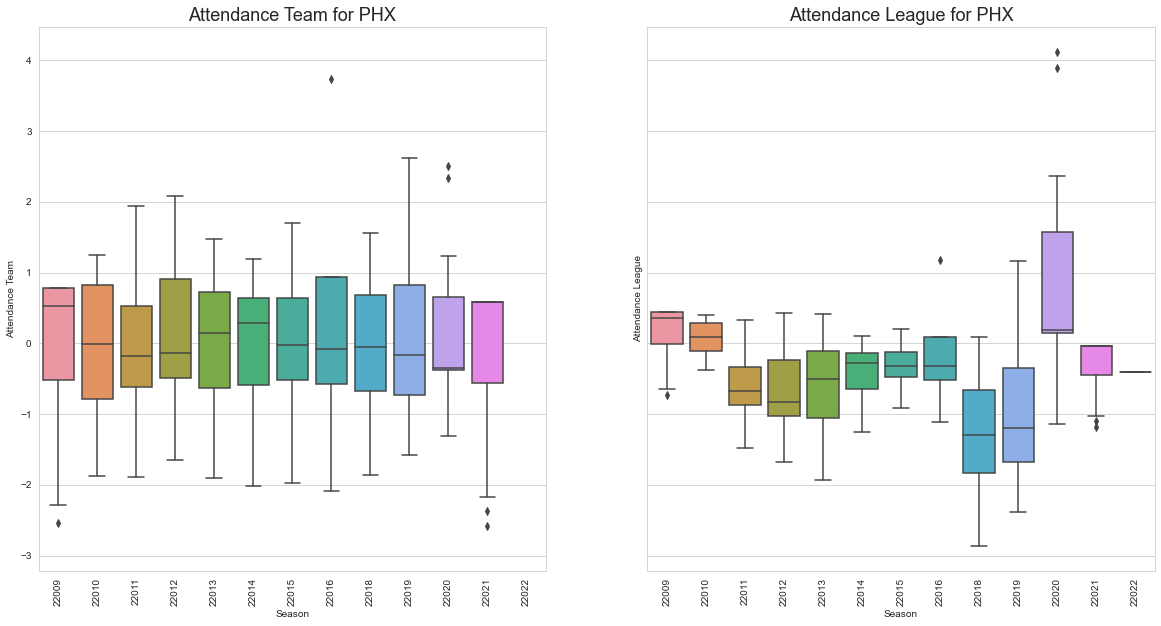

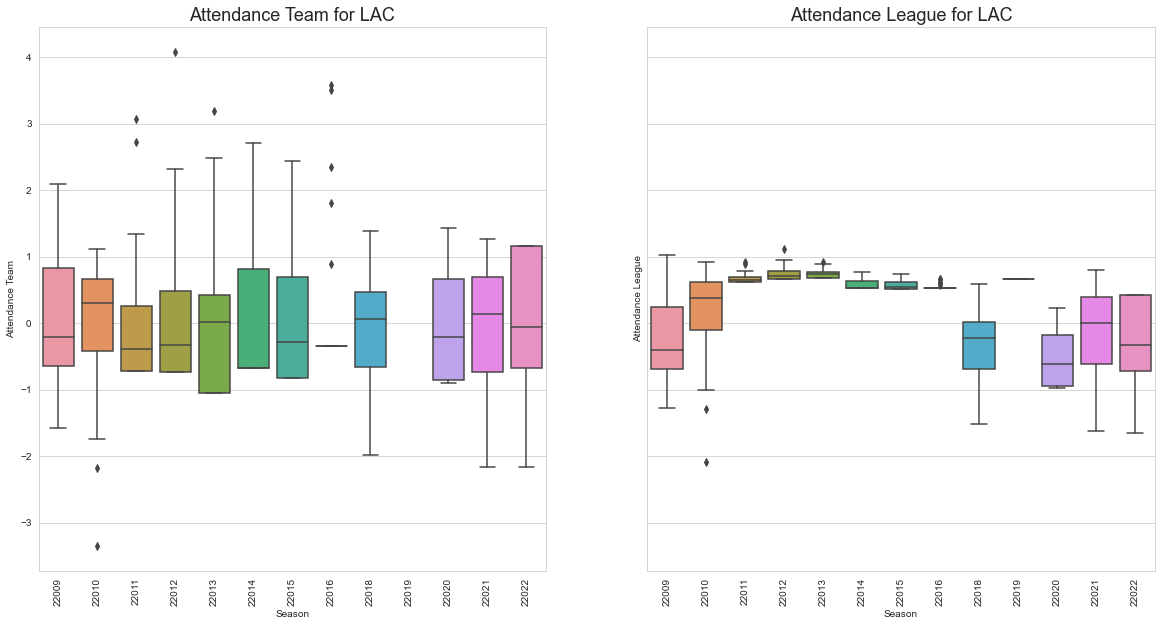

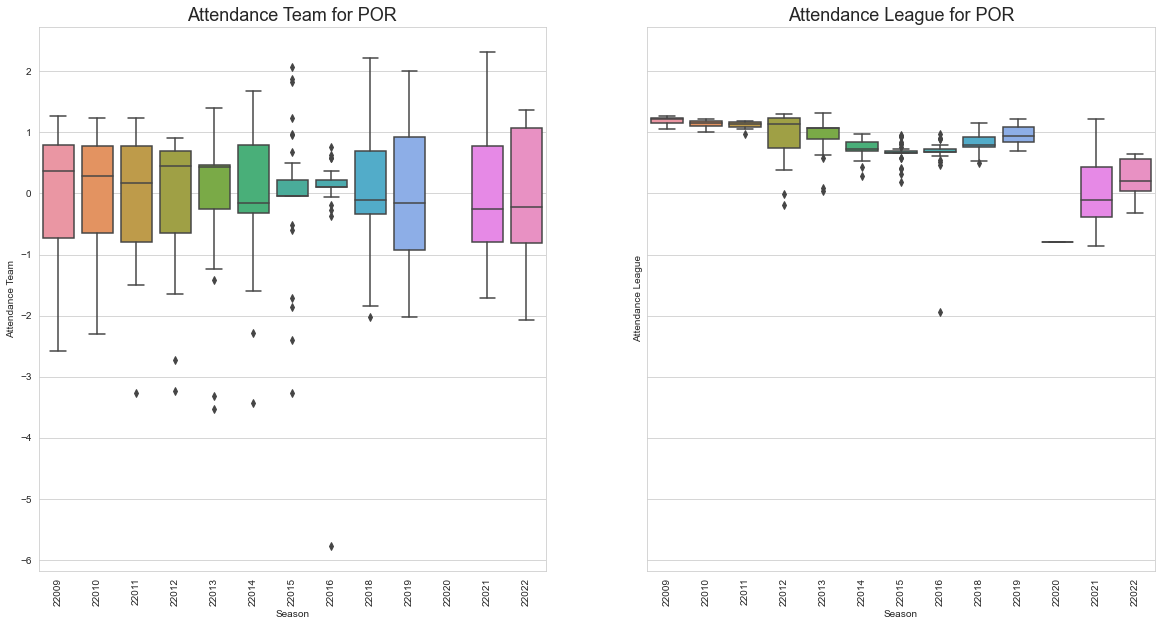

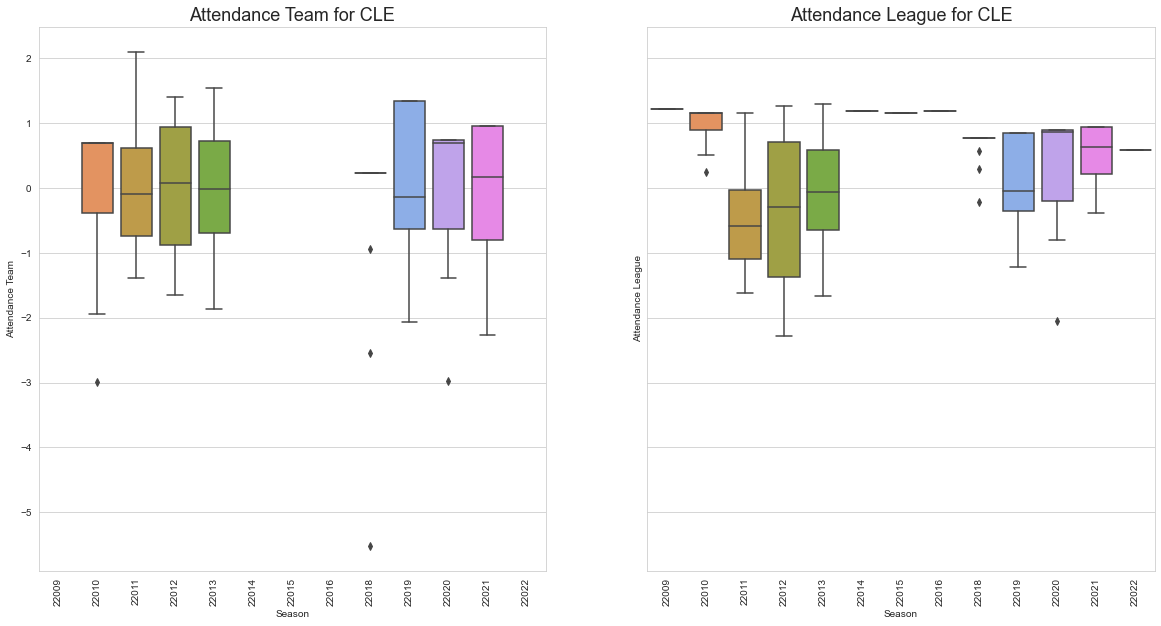

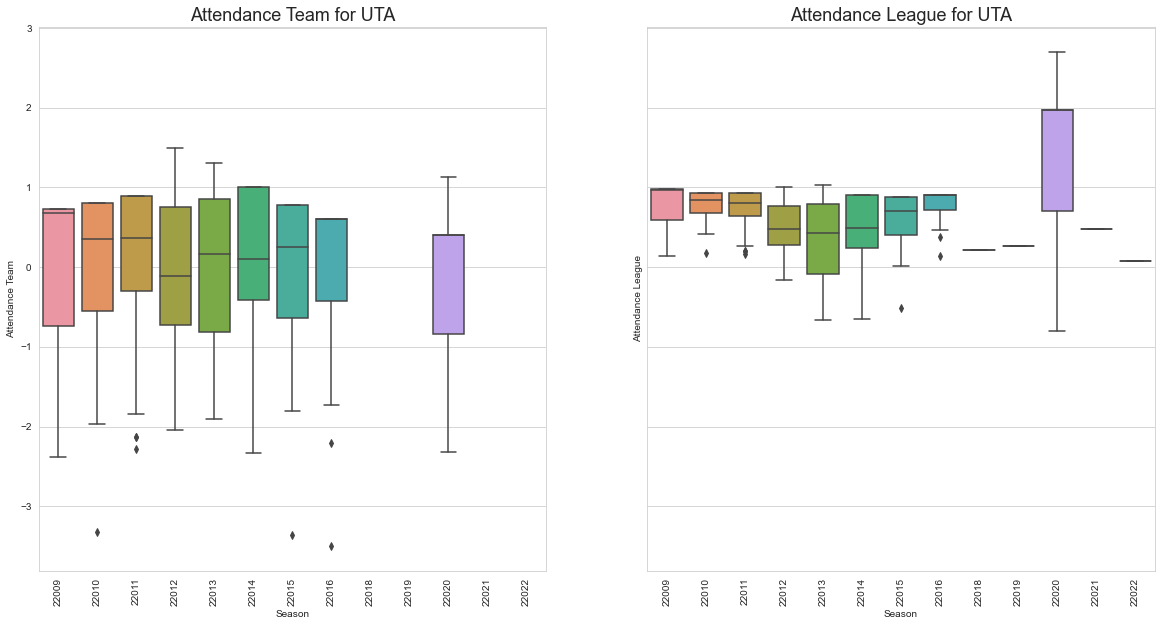

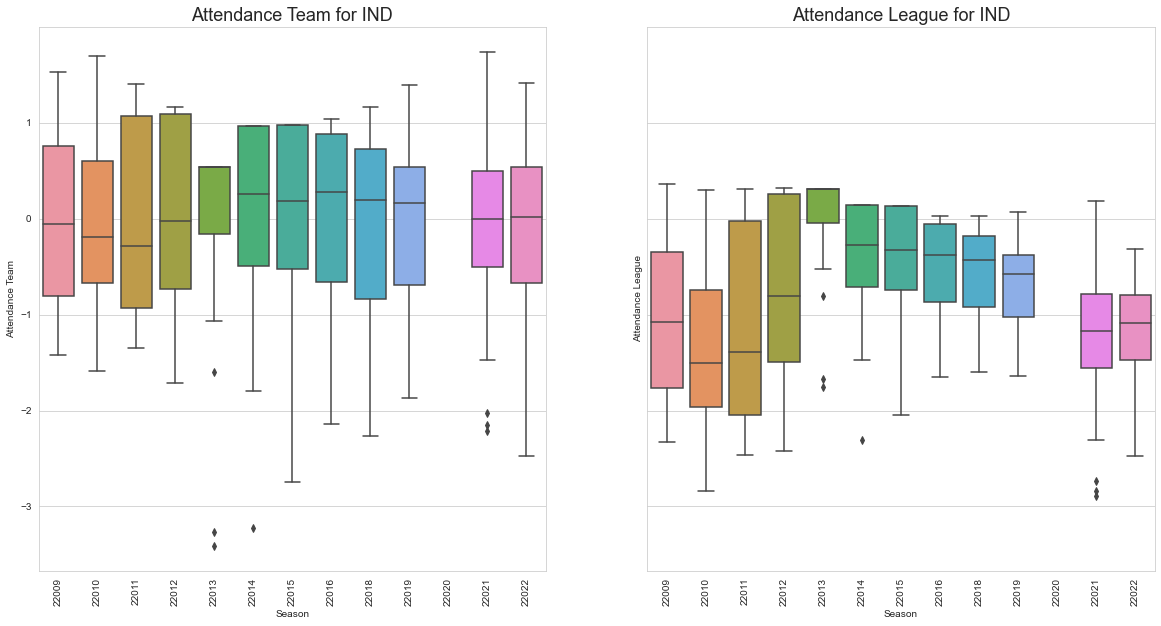

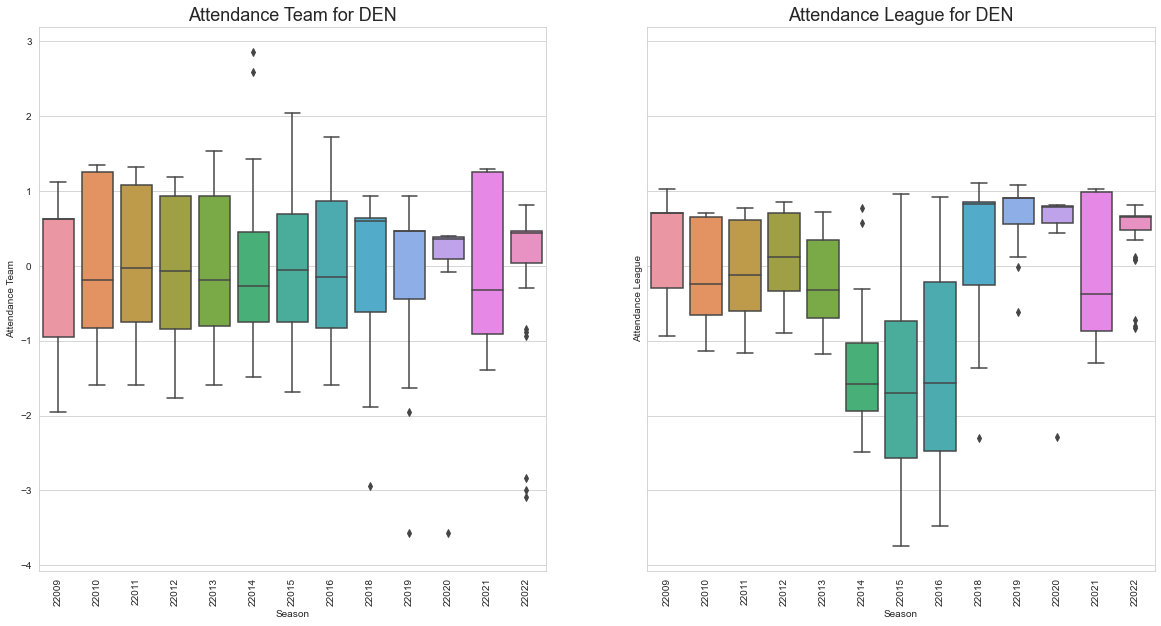

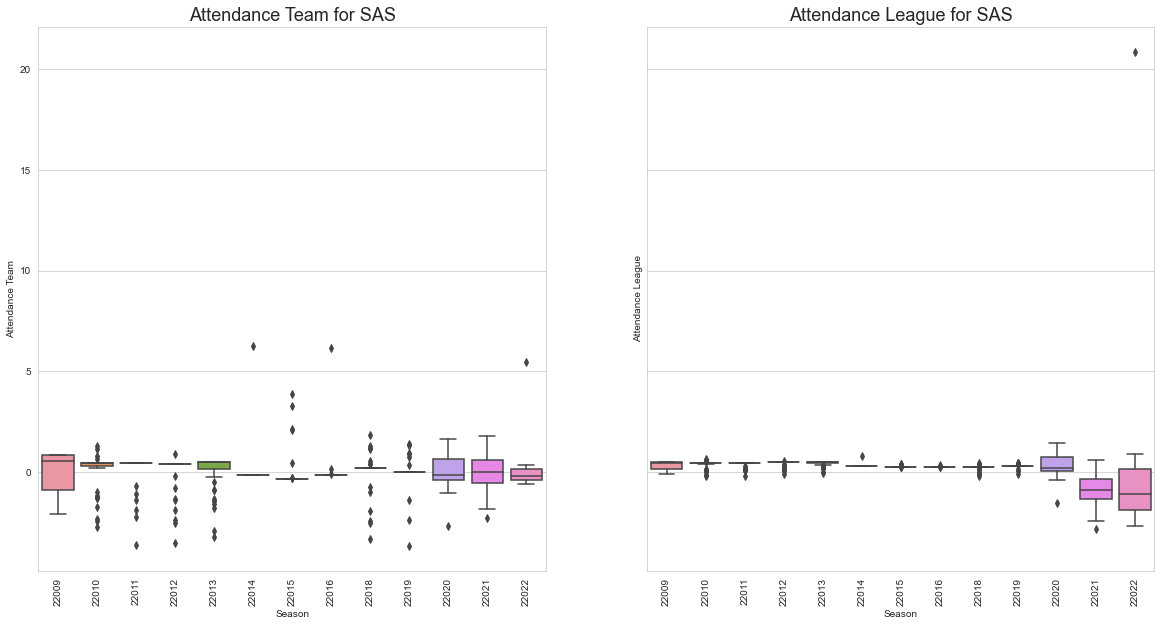

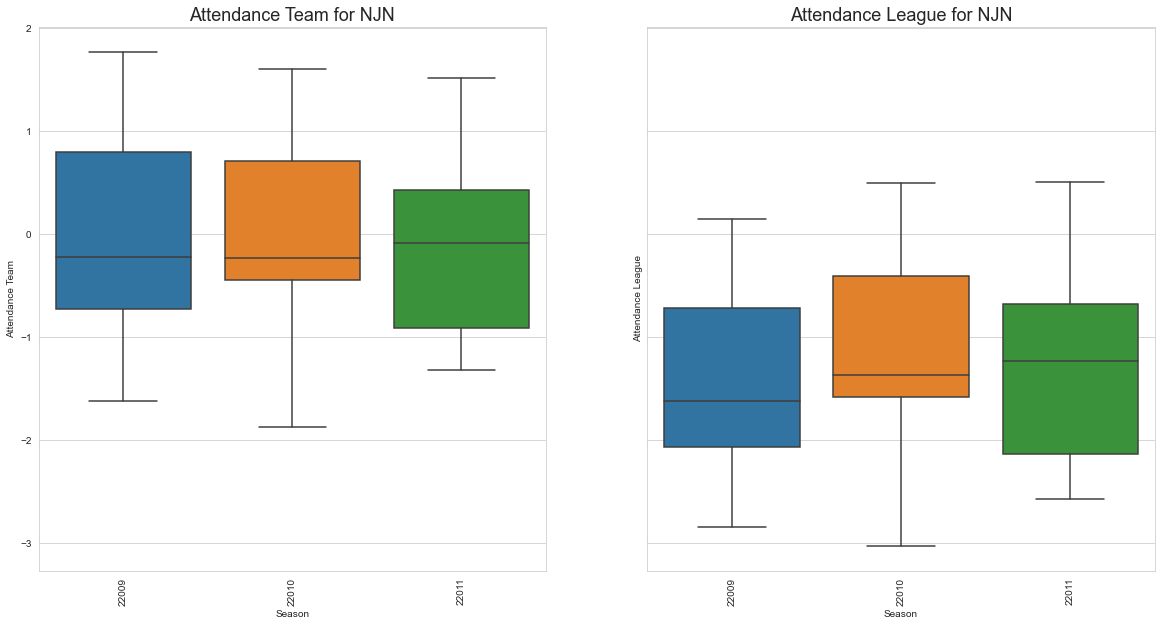

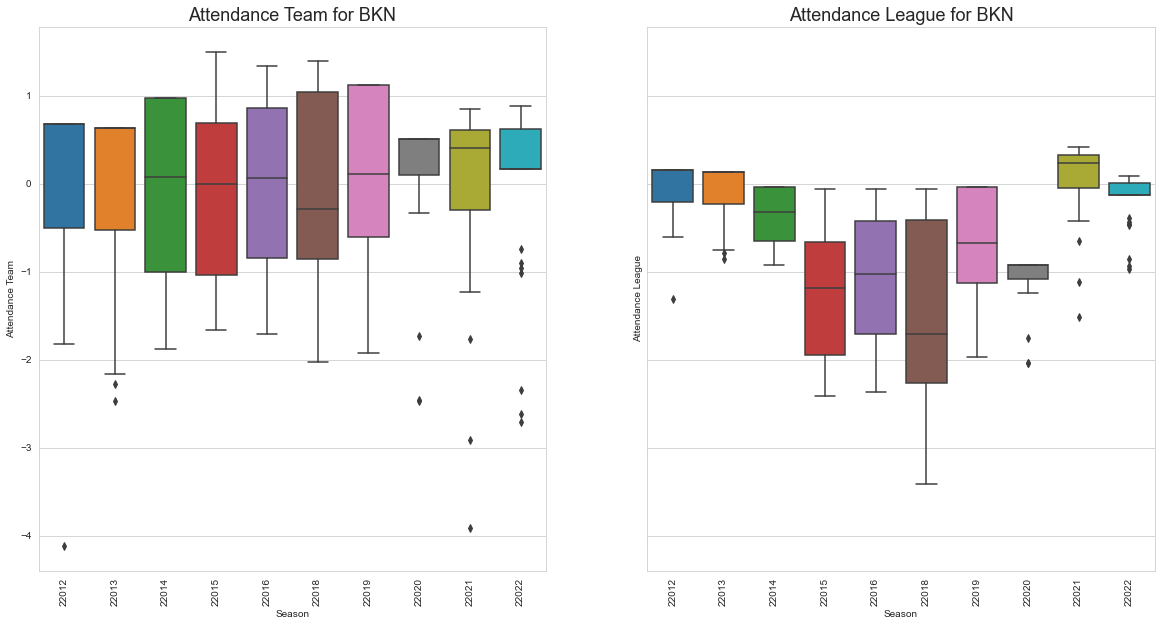

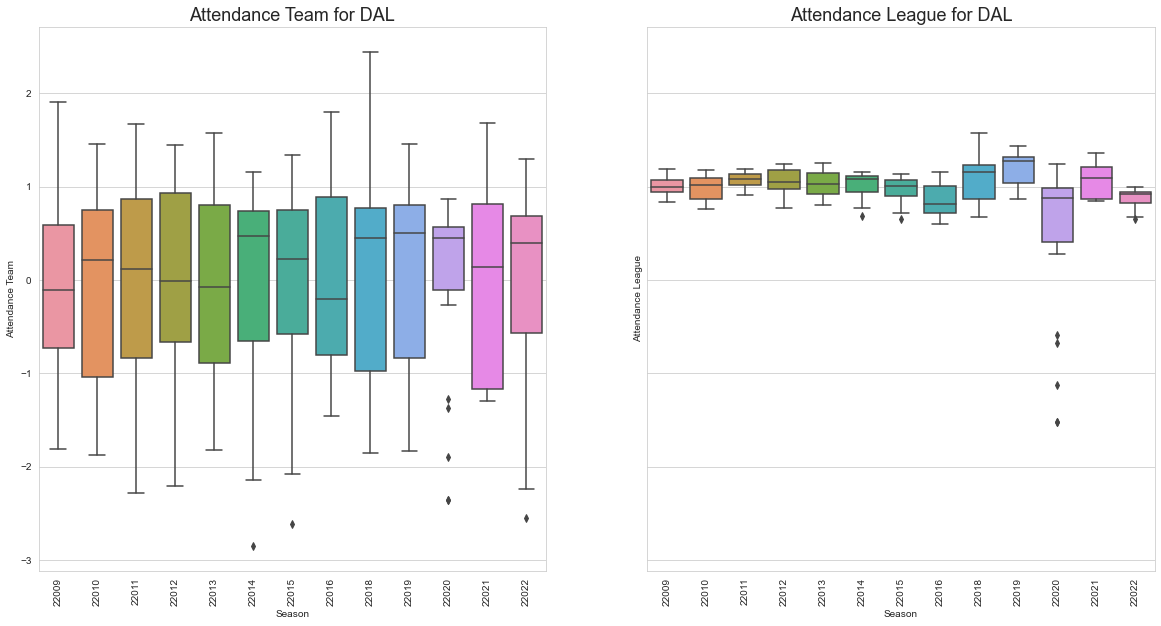

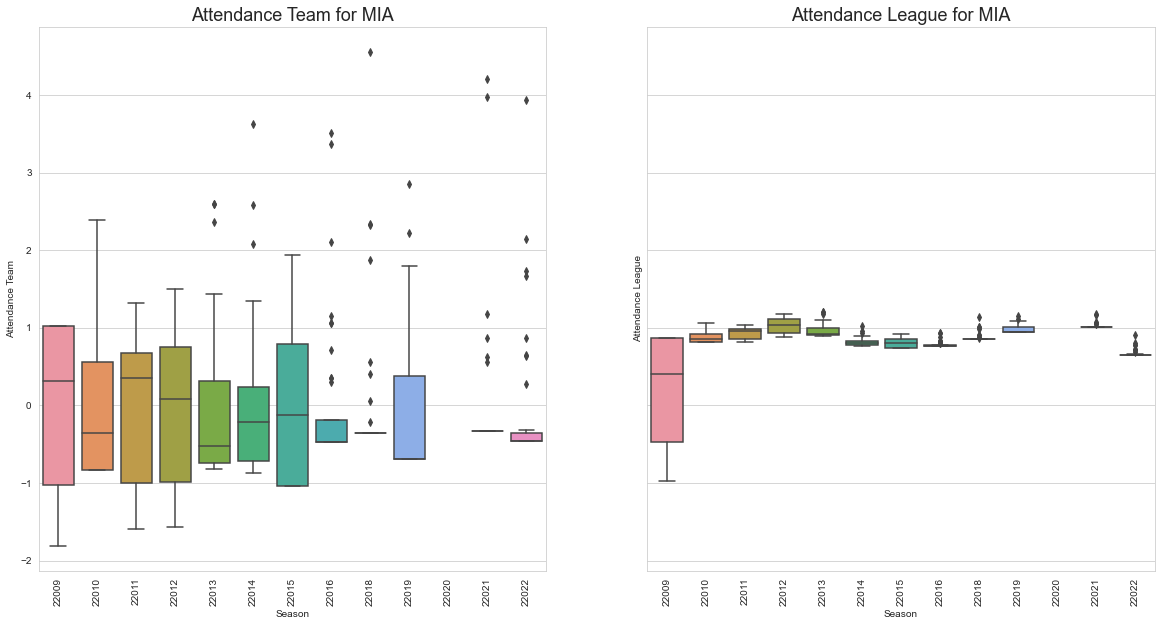

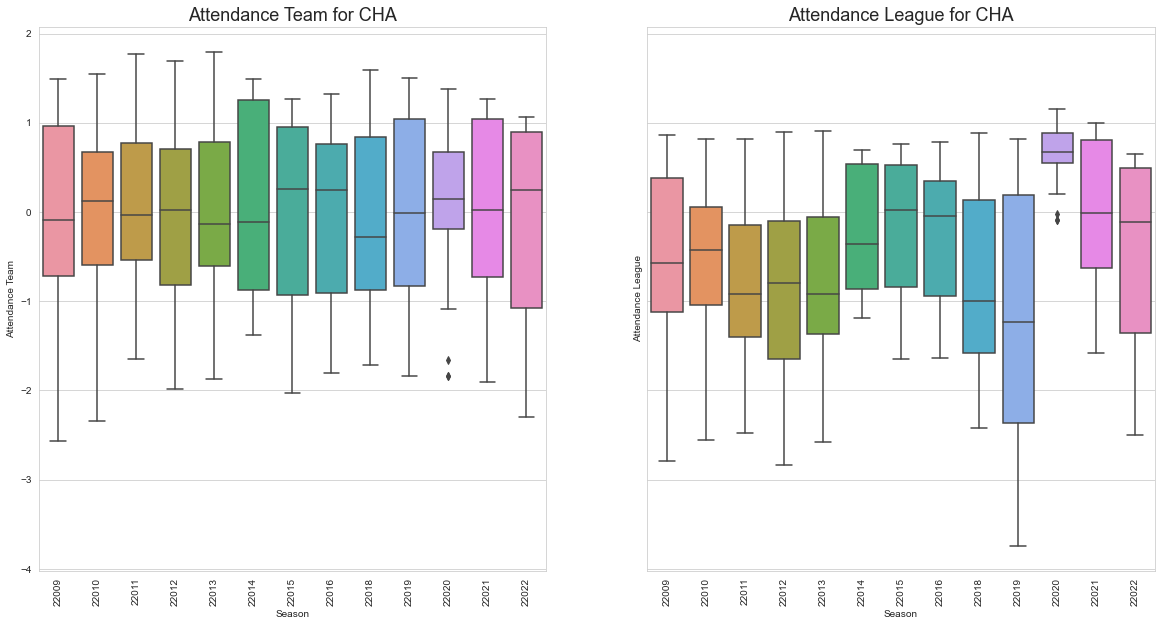

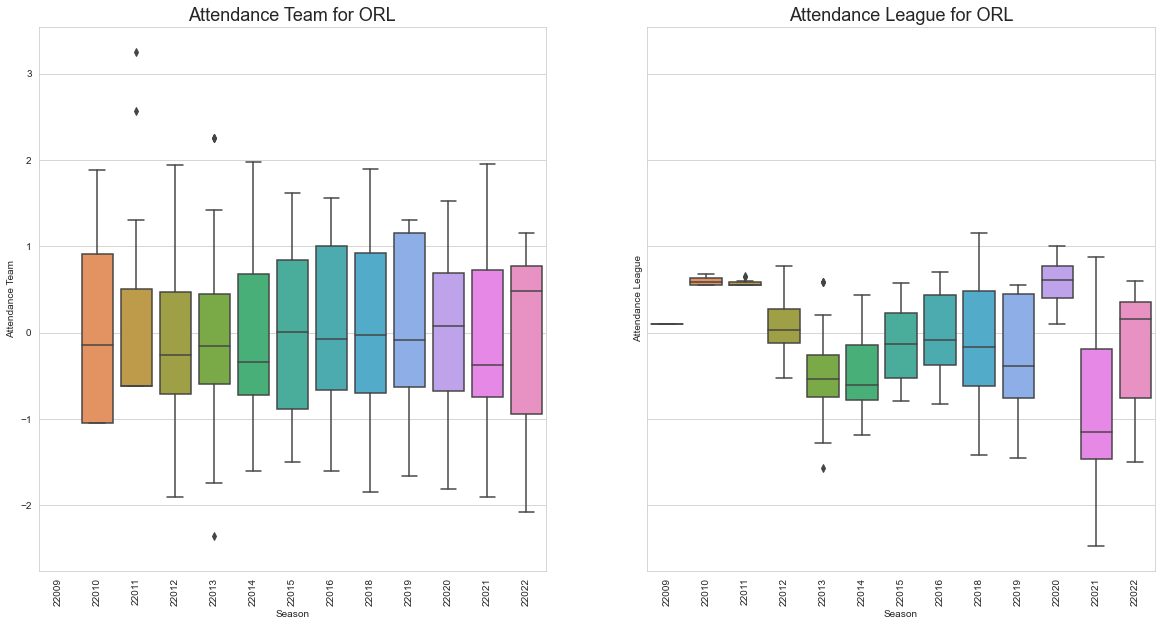

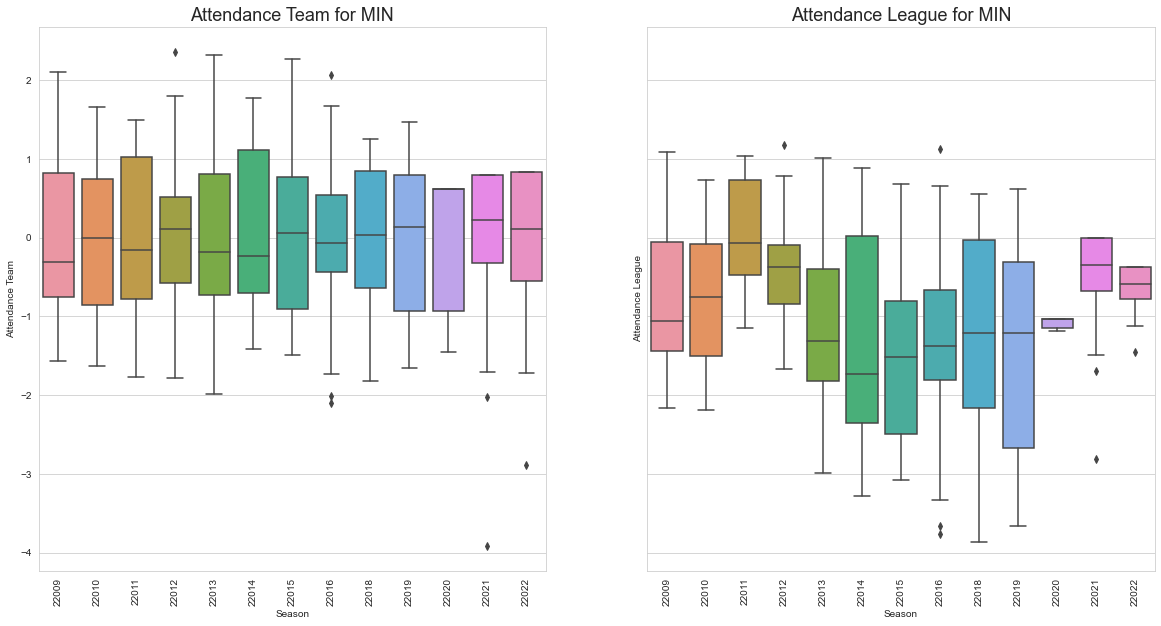

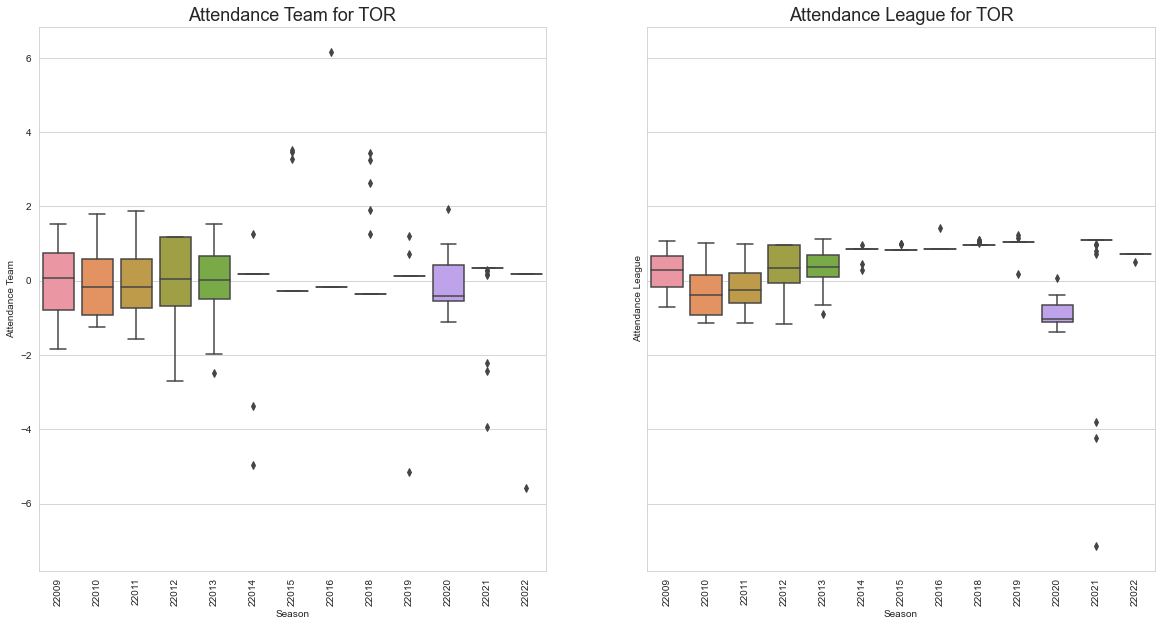

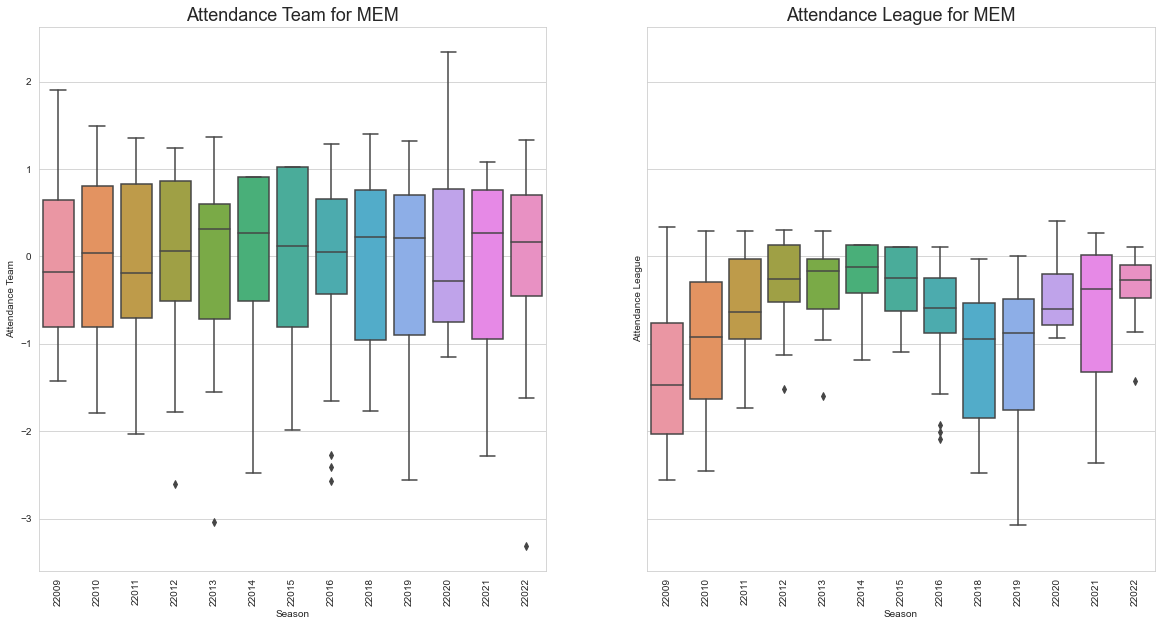

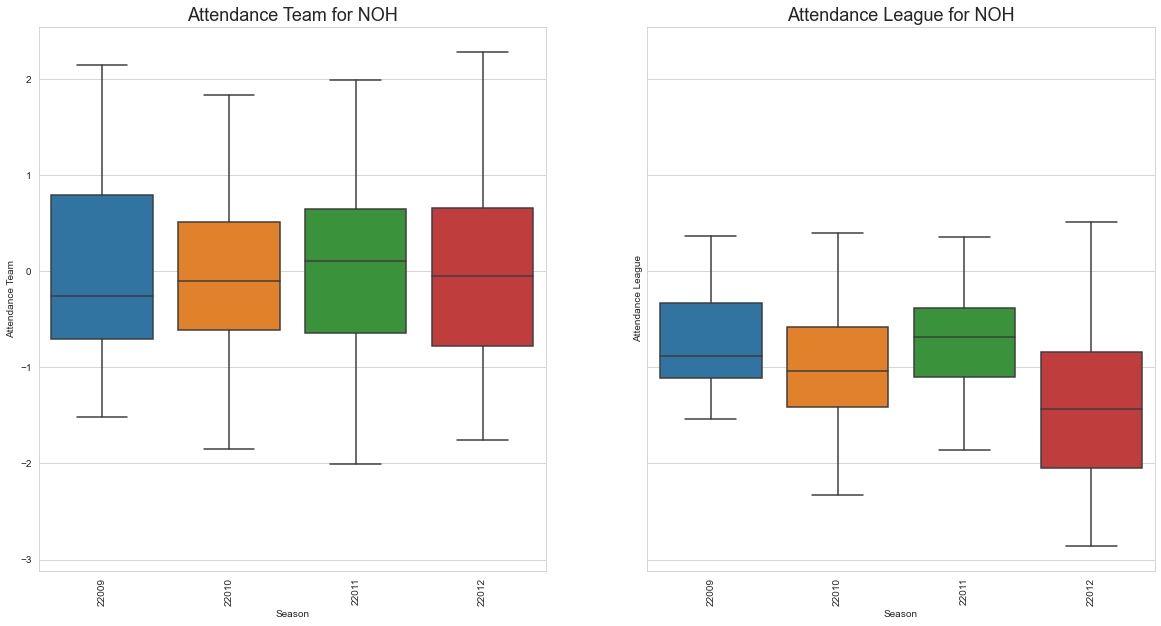

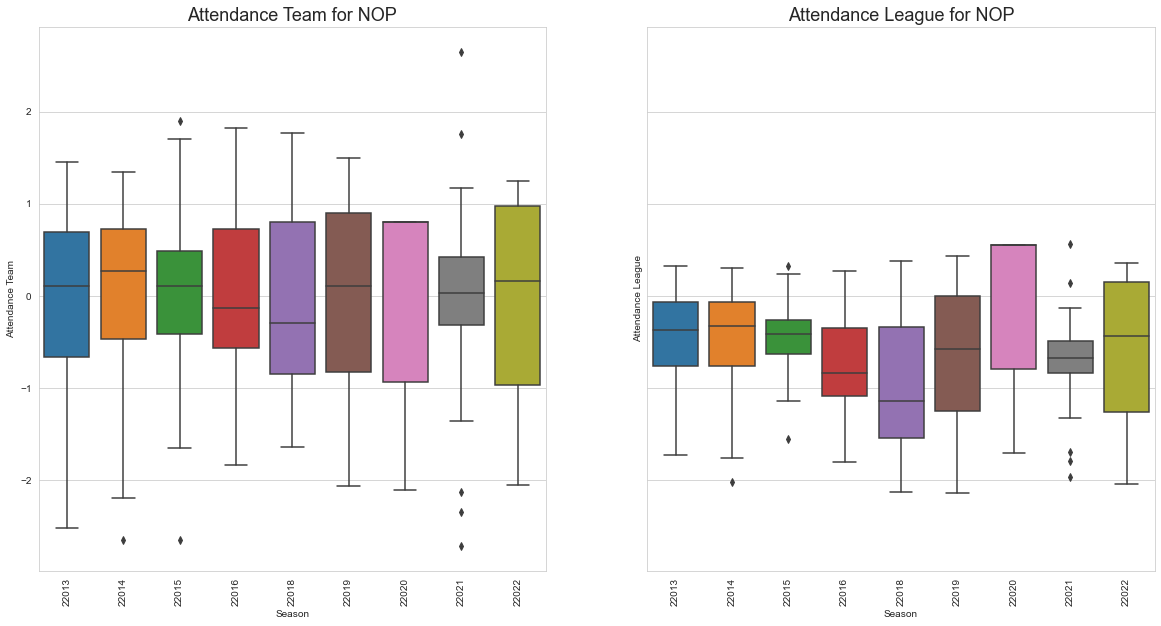

In [13]:
# 获取所有队伍的列表
teams = final_merged_data['team_abbreviation_home'].unique()

# 设置绘图风格
sns.set_style('whitegrid')

# 遍历每个队伍
for team in teams:
    # 筛选出当前队伍的数据
    team_data = final_merged_data[final_merged_data['team_abbreviation_home'] == team]

    # 设置图形大小
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

    # 绘制 attendance_team 箱形图
    sns.boxplot(ax=axes[0], data=team_data, x='season_id', y='attendance_team', order=sorted(team_data['season_id'].unique()))

    # 添加标题和标签
    axes[0].set_title(f'Attendance Team for {team}', fontsize=18)
    axes[0].set_xlabel('Season')
    axes[0].set_ylabel('Attendance Team')
    axes[0].tick_params(axis='x', rotation=90)

    # 绘制 attendance_league 箱形图
    sns.boxplot(ax=axes[1], data=team_data, x='season_id', y='attendance_league', order=sorted(team_data['season_id'].unique()))

    # 添加标题和标签
    axes[1].set_title(f'Attendance League for {team}', fontsize=18)
    axes[1].set_xlabel('Season')
    axes[1].set_ylabel('Attendance League')
    axes[1].tick_params(axis='x', rotation=90)

    # 显示图表
    plt.show()

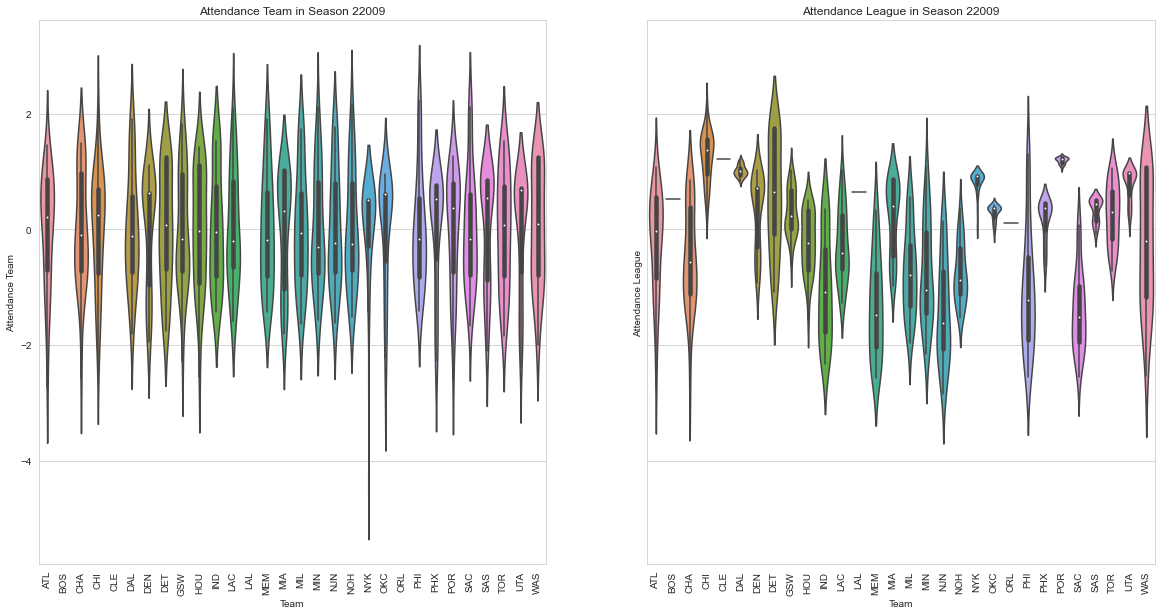

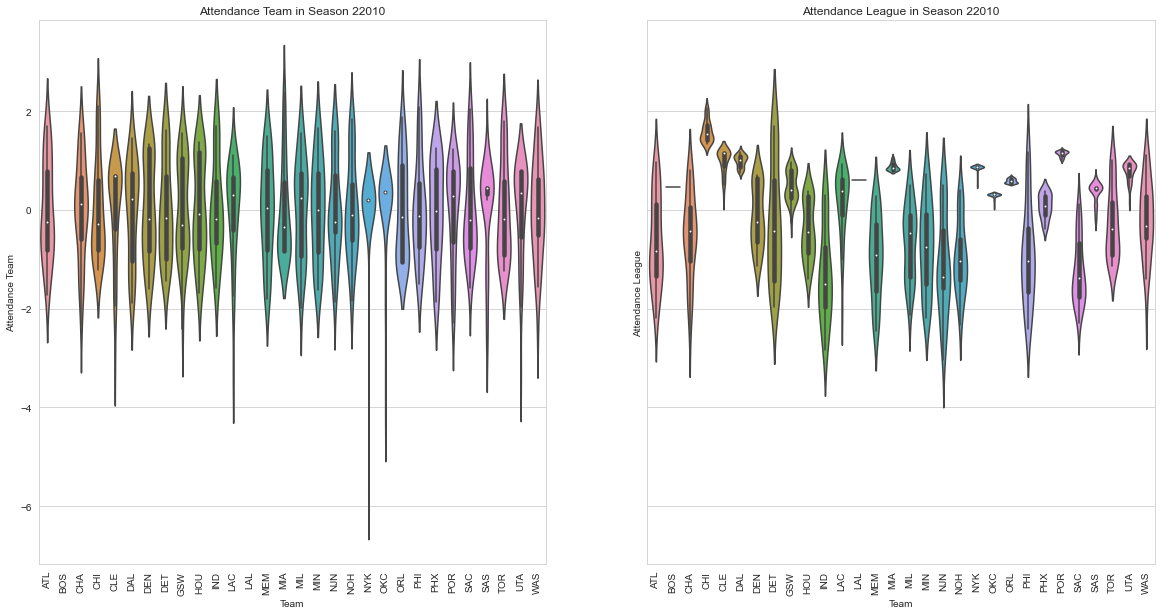

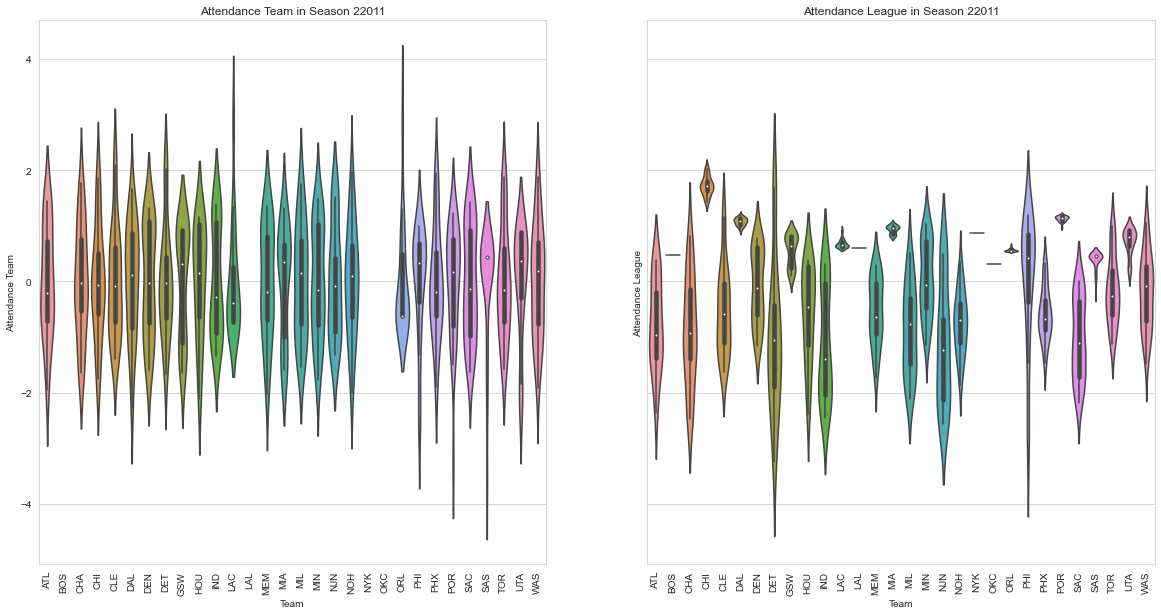

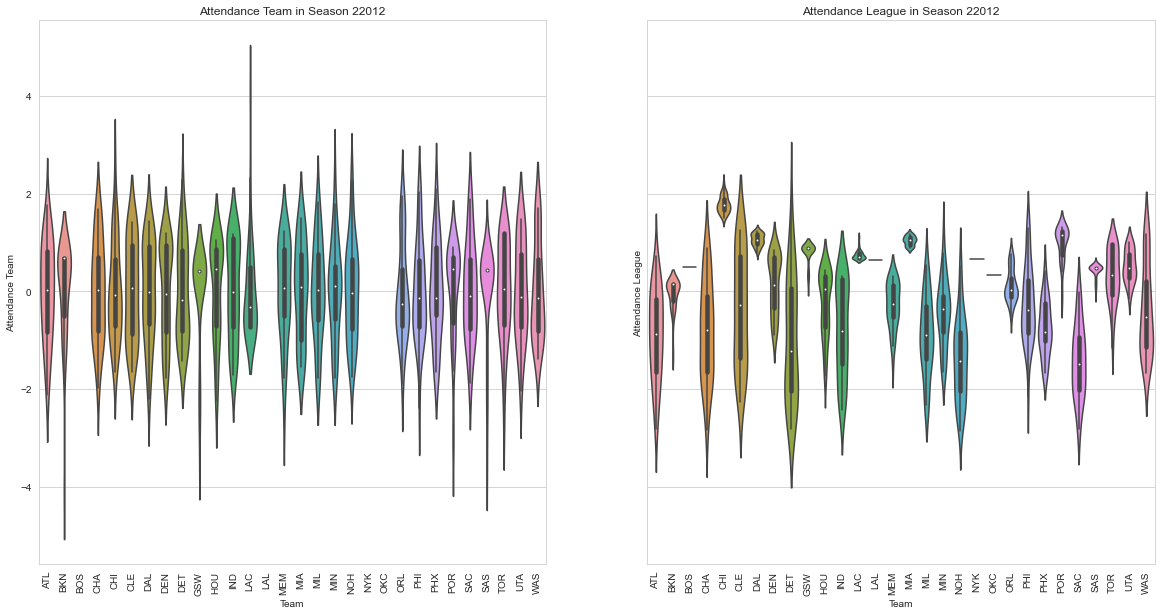

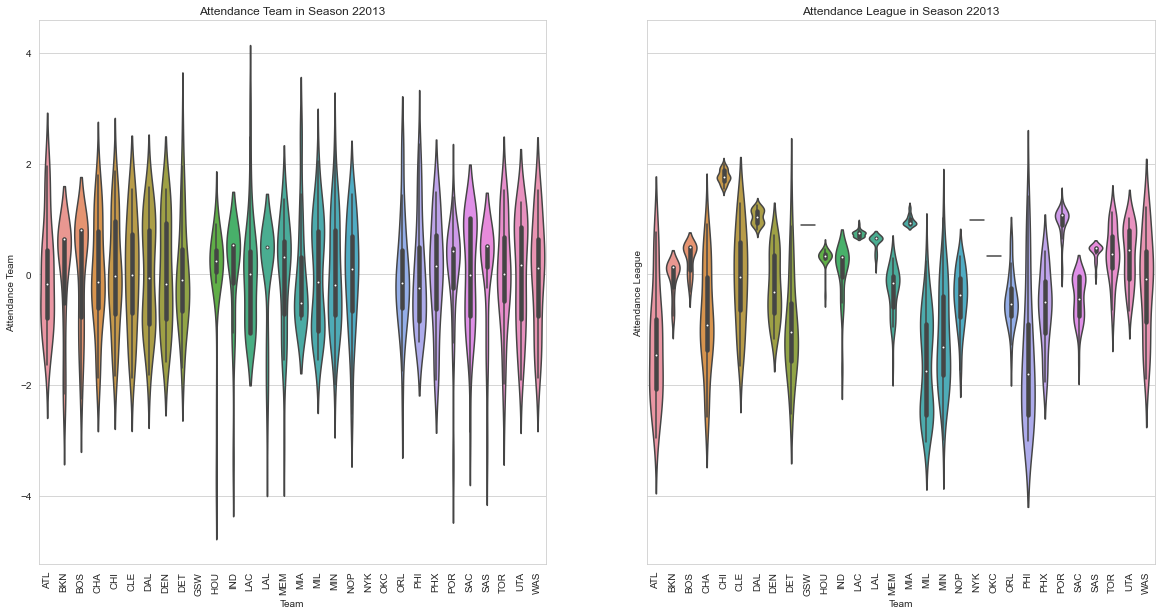

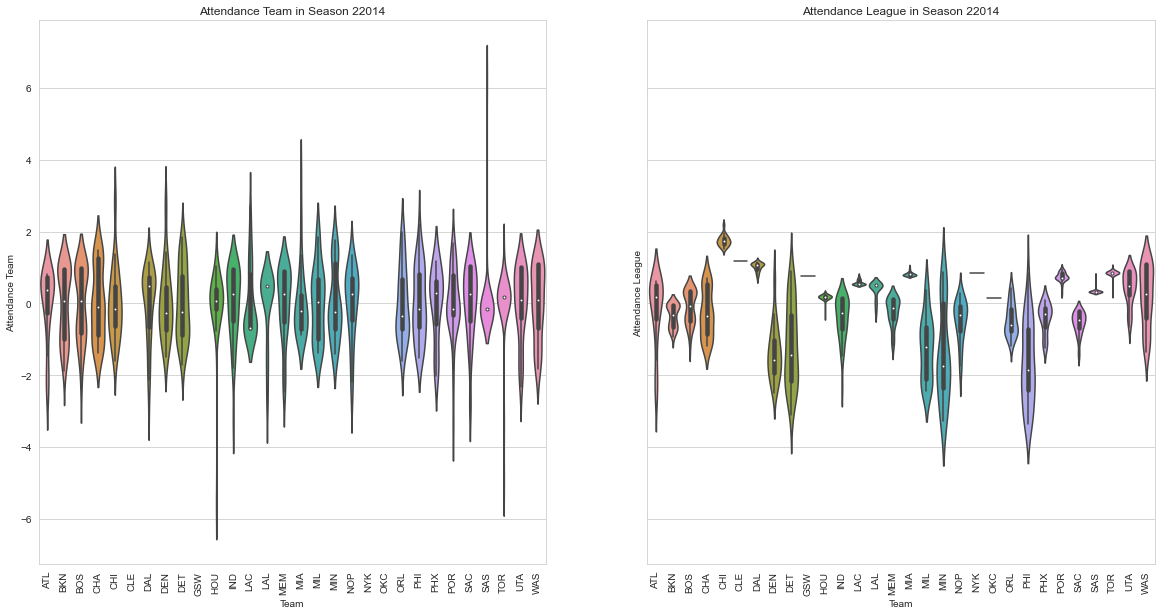

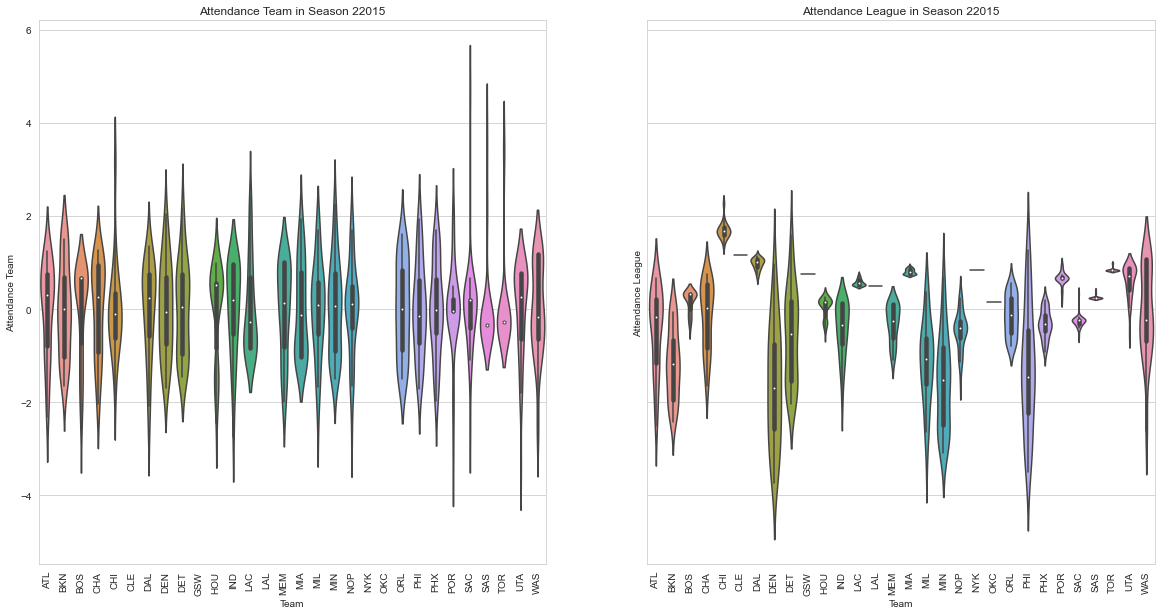

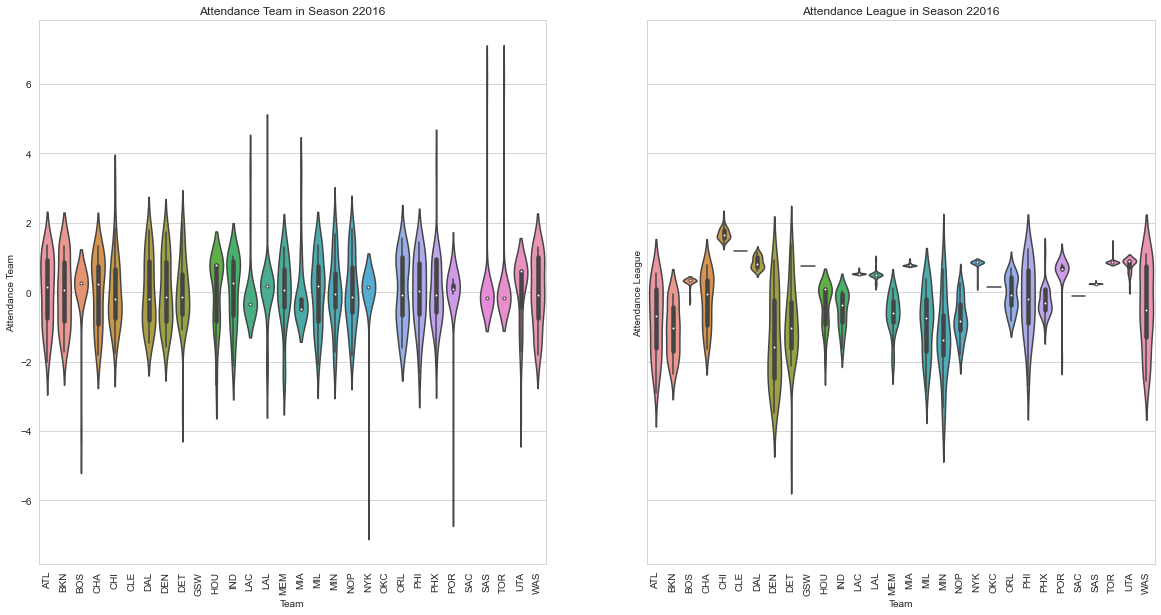

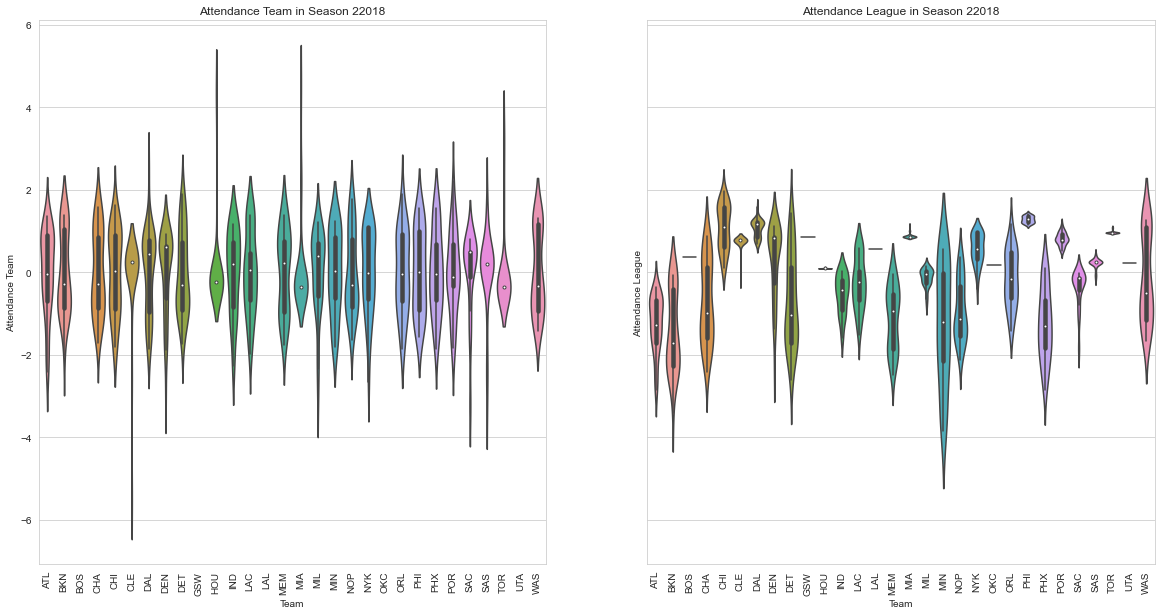

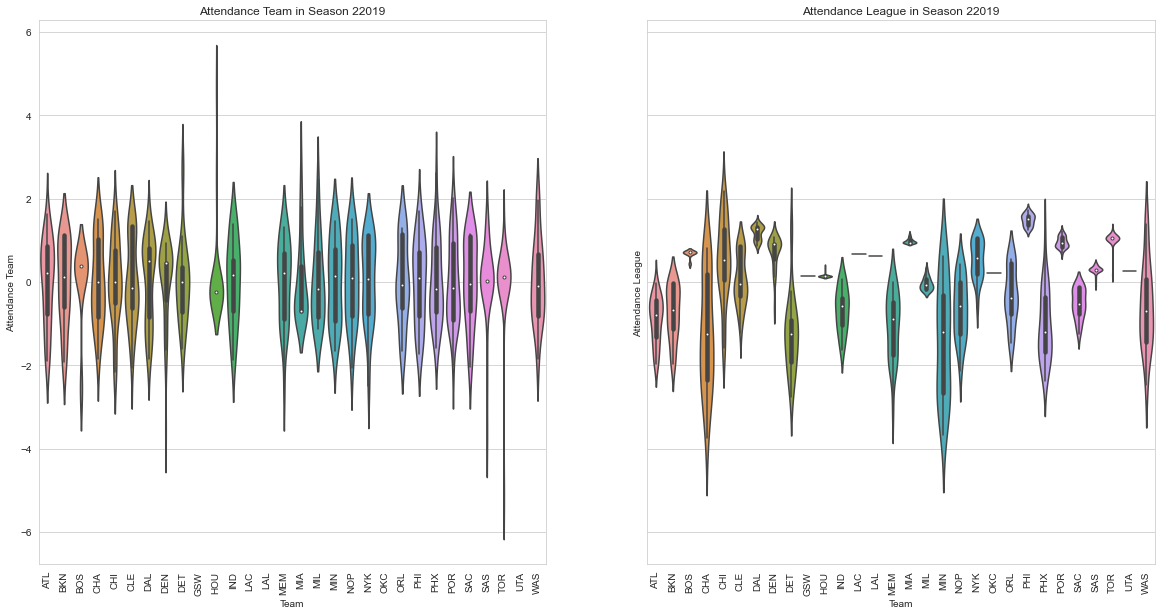

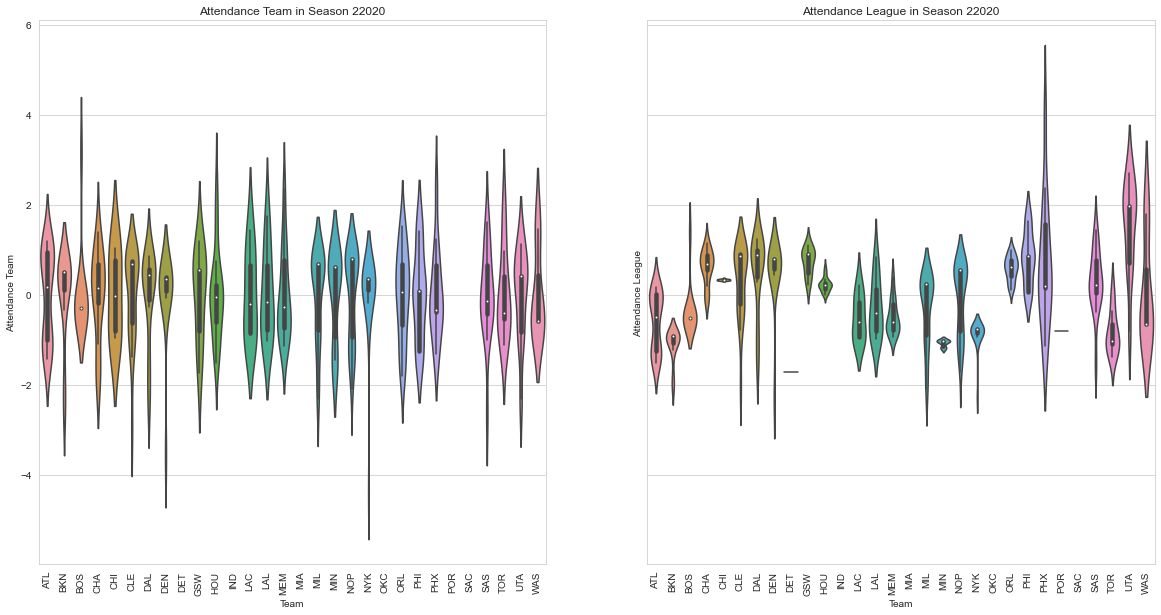

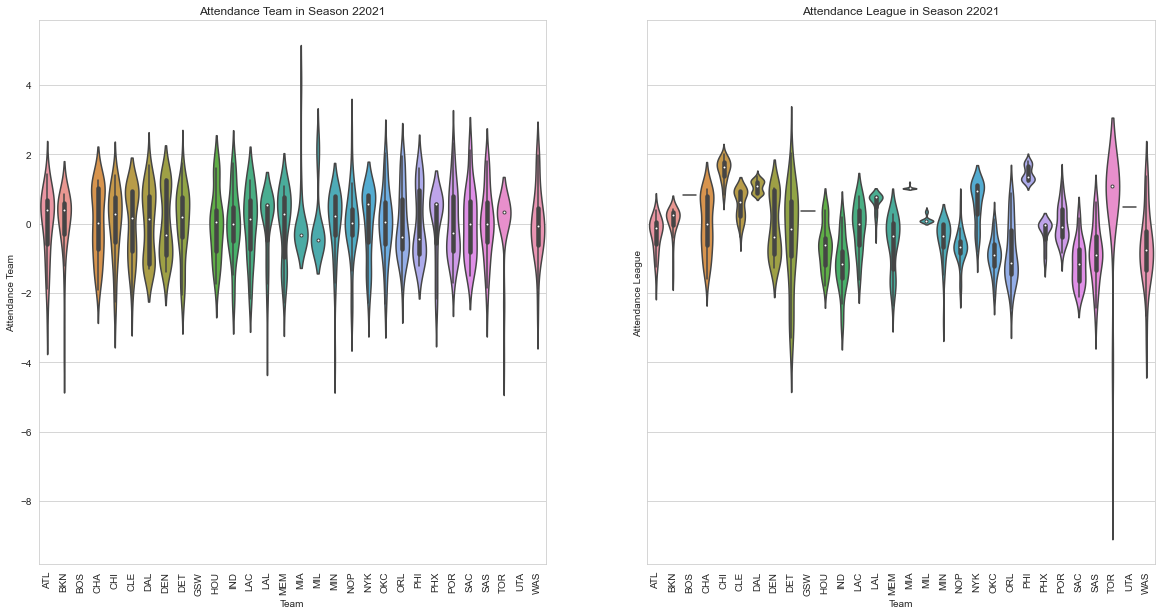

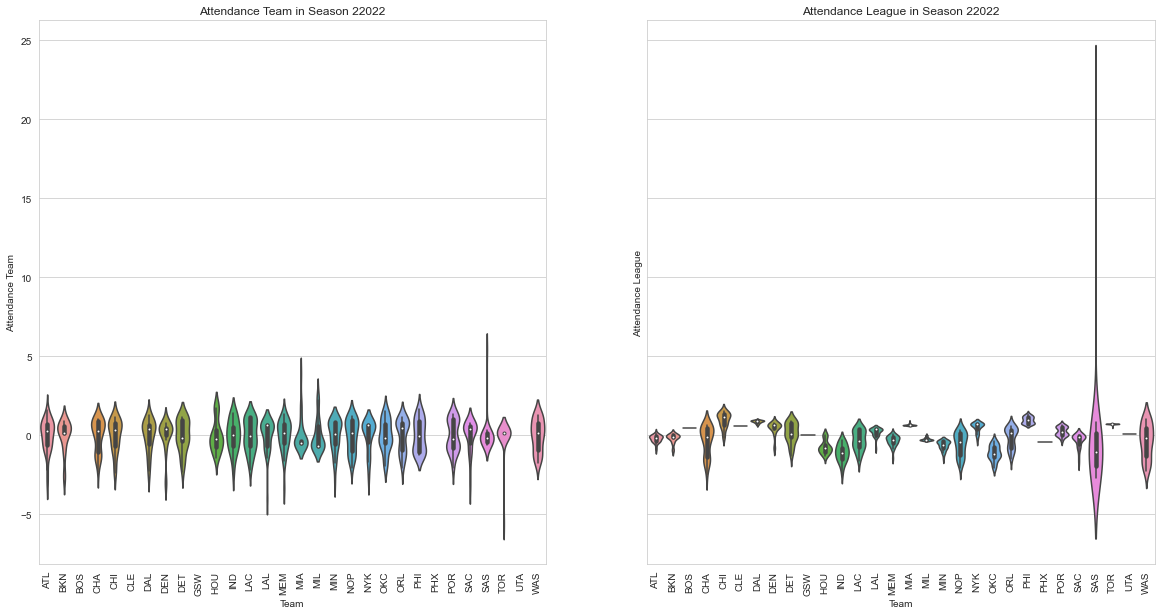

In [14]:
# 获取所有赛季的列表
seasons = final_merged_data['season_id'].unique()

# 设置绘图风格
sns.set_style('whitegrid')

# 遍历每个赛季
for season in seasons:
    # 筛选出当前赛季的数据
    season_data = final_merged_data[final_merged_data['season_id'] == season]

    # 设置图形大小
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

    # 绘制 attendance_team 小提琴图
    sns.violinplot(ax=axes[0], data=season_data, x='team_abbreviation_home', y='attendance_team', order=sorted(season_data['team_abbreviation_home'].unique()), inner="box", scale="width")

    # 添加标题和标签
    axes[0].set_title(f'Attendance Team in Season {season}')
    axes[0].set_xlabel('Team')
    axes[0].set_ylabel('Attendance Team')
    axes[0].tick_params(axis='x', rotation=90)

    # 绘制 attendance_league 小提琴图
    sns.violinplot(ax=axes[1], data=season_data, x='team_abbreviation_home', y='attendance_league', order=sorted(season_data['team_abbreviation_home'].unique()), inner="box", scale="width")

    # 添加标题和标签
    axes[1].set_title(f'Attendance League in Season {season}')
    axes[1].set_xlabel('Team')
    axes[1].set_ylabel('Attendance League')
    axes[1].tick_params(axis='x', rotation=90)

    # 显示图表
    plt.show()

In [15]:
home_wins = final_merged_data[final_merged_data['wl_home'] == 'W'].shape[0]
home_losses = final_merged_data[final_merged_data['wl_home'] == 'L'].shape[0]

away_wins = final_merged_data[final_merged_data['wl_away'] == 'W'].shape[0]
away_losses = final_merged_data[final_merged_data['wl_away'] == 'L'].shape[0]

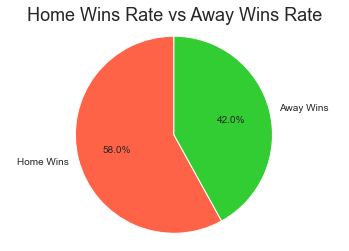

In [16]:
# Pie chart data
labels = ['Home Wins', 'Away Wins']
# sizes = [home_wins, home_losses, away_wins, away_losses]
sizes = [home_wins, away_wins]
# colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700']
colors = ['#FF6347', '#32CD32']
# Plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
ax.set_title('Home Wins Rate vs Away Wins Rate', fontsize=18)
# Save the pie chart as an image
fig.savefig('images/pie_chart.png')  # 将图像保存为PNG文件

# Display the pie chart
plt.show()

# Close the figure to avoid showing the chart in the notebook
plt.close(fig)


In [17]:
season_group = final_merged_data.groupby('season_id')
win_rate_per_season = season_group['wl_home'].apply(lambda x: (x == 'W').sum() / x.count())

# index_range = pd.Index(range(22001, 22024))  # 包含22001到22023的范围
# win_rate_per_season = win_rate_per_season.reindex(index_range, fill_value=0)

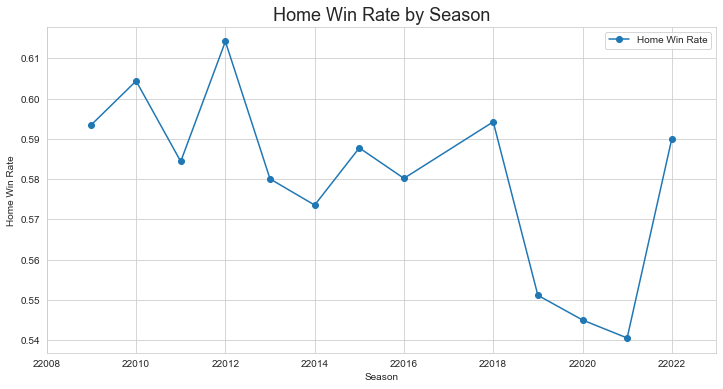

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a line chart
ax.plot(win_rate_per_season.index, win_rate_per_season, marker='o', linestyle='-', label='Home Win Rate')

# Plot an area chart (uncomment the following line to use an area chart)
# ax.fill_between(win_rate_per_season.index, win_rate_per_season, color='skyblue', alpha=0.5, label='Home Win Rate')

# Customize the chart
ax.set_xlabel('Season')
ax.set_ylabel('Home Win Rate')
ax.set_title('Home Win Rate by Season', fontsize=18)
ax.legend()

ax.set_xlim(22008, 22023)
ax.set_xticks(np.arange(22008, 22024, step=2))

# Save the pie chart as an image
fig.savefig('images/Home_Win_Rate_By_Season.png')  # 将图像保存为PNG文件

# Display the chart
plt.show()

# Close the figure to avoid showing the chart in the notebook
plt.close(fig)

In [19]:
# calculate win # of each team
home_wins = final_merged_data[final_merged_data['wl_home'] == 'W'].groupby('team_id_home')['wl_home'].count().reset_index()
home_wins.columns = ['team_id', 'home_wins']

# calculate home match for each number
home_games = final_merged_data.groupby('team_id_home')['wl_home'].count().reset_index()
home_games.columns = ['team_id', 'home_games']

# home advantege calculated
home_advantage = pd.merge(home_wins, home_games, on='team_id')
home_advantage['home_win_rate'] = home_advantage['home_wins'] / home_advantage['home_games']

# merge 
team_home_advantage = pd.merge(team_df, home_advantage, left_on='id', right_on='team_id')

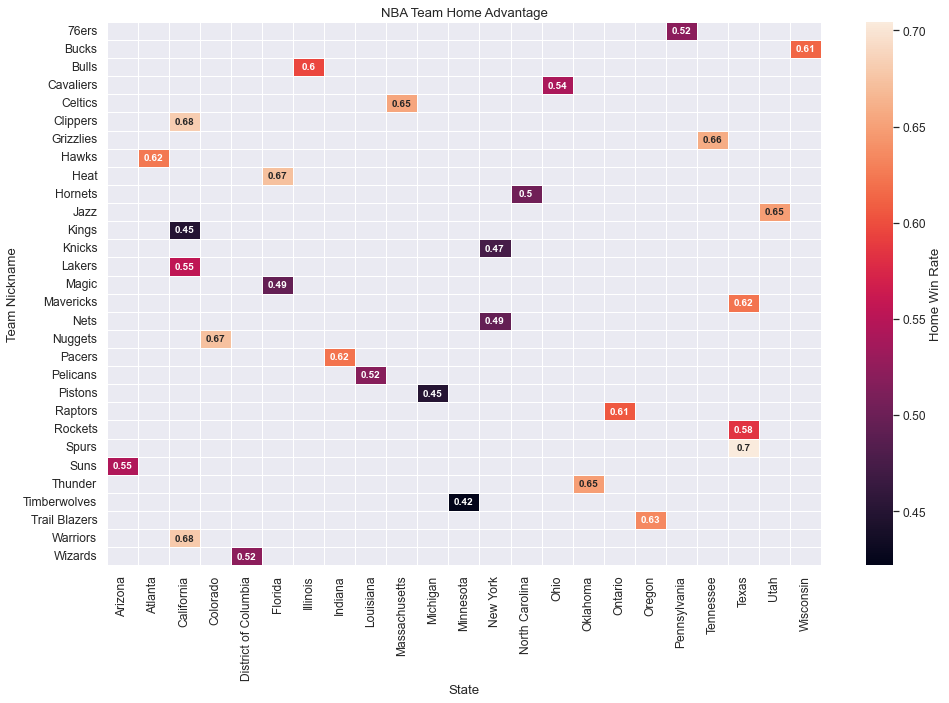

In [20]:
# Prepare the data for the heatmap
team_home_advantage_pivot = team_home_advantage.pivot(
    index="nickname",
    columns="state",
    values="home_win_rate"
)

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.1)  # Adjust font size
heatmap = sns.heatmap(
    team_home_advantage_pivot,
    annot=True,
    linewidths=0.5,
    cbar_kws={"label": "Home Win Rate"},
    annot_kws={"fontsize": 10, "fontweight": "bold"}
)

# Add gridlines
heatmap.set_xticks([x + 0.5 for x in range(len(team_home_advantage_pivot.columns))], minor=True)
heatmap.set_yticks([y + 0.5 for y in range(len(team_home_advantage_pivot.index))], minor=True)
heatmap.xaxis.set_ticks_position('none') 
heatmap.yaxis.set_ticks_position('none') 
heatmap.grid(which='minor', color='black', linewidth=1)

plt.title("NBA Team Home Advantage")
plt.xlabel("State")
plt.ylabel("Team Nickname")
plt.show()

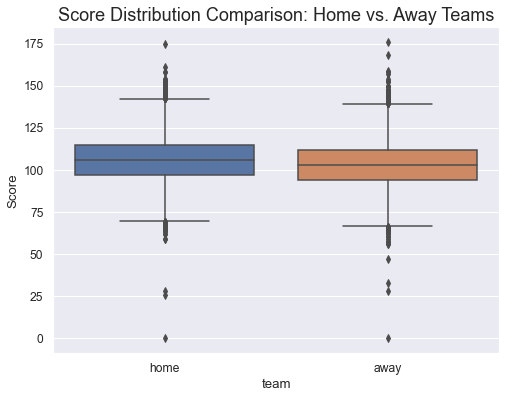

In [21]:
score_data = pd.DataFrame({
    "team": ["home"] * len(final_merged_data) + ["away"] * len(final_merged_data),
    "score": final_merged_data["pts_home"].tolist() + final_merged_data["pts_away"].tolist()
})

fig = plt.figure(figsize=(8, 6))
sns.boxplot(x="team", y="score", data=score_data)
plt.title("Score Distribution Comparison: Home vs. Away Teams", fontsize=18)
plt.ylabel("Score")

# Save the pie chart as an image
fig.savefig('images/Score_Distribution_Comparsion.png')  # 将图像保存为PNG文件

# Display the chart
plt.show()

# Close the figure to avoid showing the chart in the notebook
plt.close(fig)

In [22]:
# # Create a copy of the dataframe to avoid modifying the original dataframe
encoded_data = final_merged_data.copy()

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

# Fit and transform the selected columns
encoded_columns = encoder.fit_transform(encoded_data[['timezone']])
label_encoder_columns = label_encoder.fit_transform(encoded_data['wl_home'])
# Assign the encoded columns back to the dataframe
encoded_data[['timezone']] = encoded_columns
# print(len(label_encoder_columns))
# print(len(encoded_data[['wl_home']]))
encoded_data['wl_home'] = label_encoder_columns

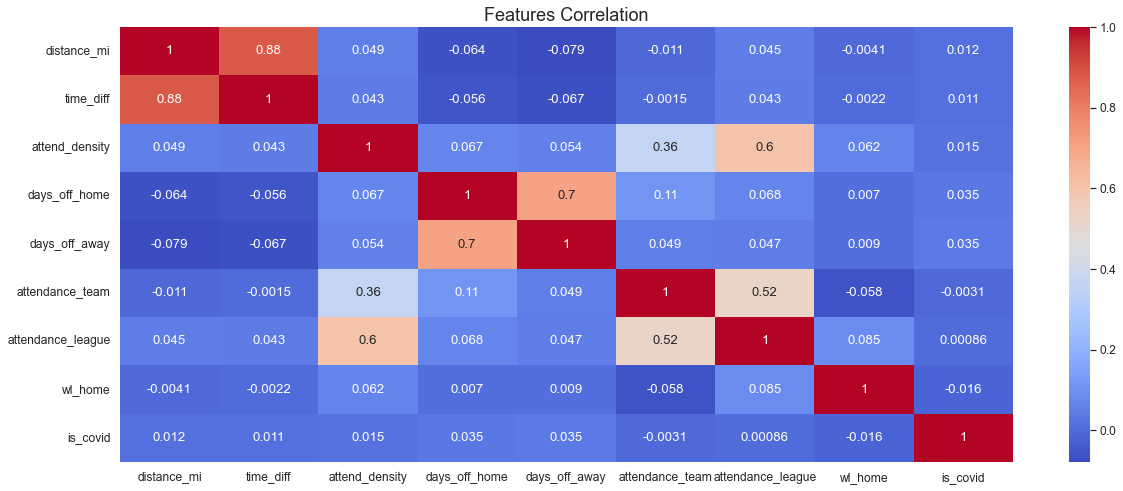

In [23]:
scaler = MinMaxScaler()
columns_to_normalize = ['distance_mi', 'time_diff', 'attend_density', 'days_off_home', 'days_off_away', 'attendance_team', 'attendance_league', 'wl_home', 'is_covid']
encoded_data[columns_to_normalize] = scaler.fit_transform(encoded_data[columns_to_normalize])
factors = encoded_data[columns_to_normalize]
correlations = factors.corr()
fig = plt.figure(figsize=(20, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Features Correlation", fontsize=18)
# Save the pie chart as an image
fig.savefig('images/Features_Correlation_Map')  # 将图像保存为PNG文件

# Display the chart
plt.show()

# Close the figure to avoid showing the chart in the notebook
plt.close(fig)

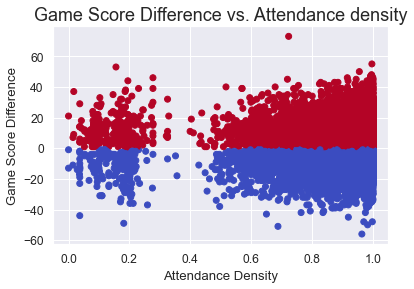

In [24]:
filtered_data = final_merged_data[(final_merged_data['attend_density'] >= 0) & (final_merged_data['attend_density'] <= 1)]
# Create a figure and axis
fig, ax = plt.subplots()

# Create the scatter plot
ax.scatter(filtered_data['attend_density'], filtered_data['plus_minus_home'], c=filtered_data['home_advantage'], cmap='coolwarm')

# Set axis labels and title
ax.set_xlabel('Attendance Density')
ax.set_ylabel('Game Score Difference')
ax.set_title('Game Score Difference vs. Attendance density', fontsize=18)

# Save the scatter plot as an image

fig.savefig('images/scatter_plot_home_adv_attend_density.png')  # 将图像保存为PNG文件
# Display the chart
plt.show()

In [26]:
features = ['arenacapacity_away', 'arenacapacity_home', 'attend_density', 'time_diff', 'distance_mi']

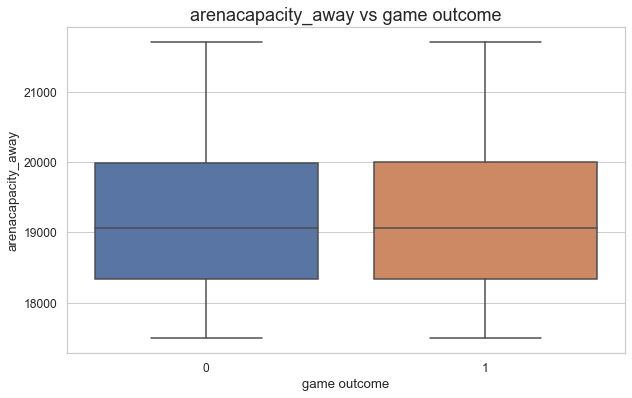

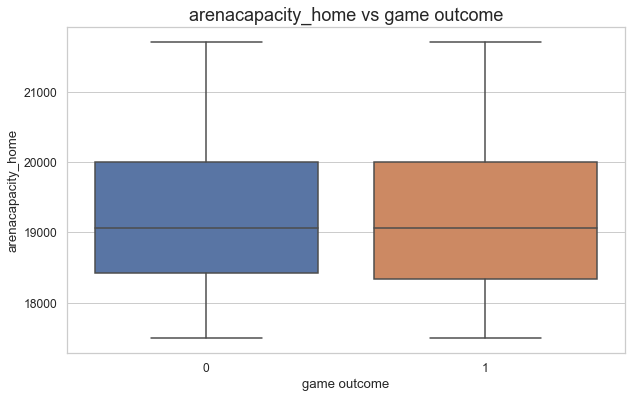

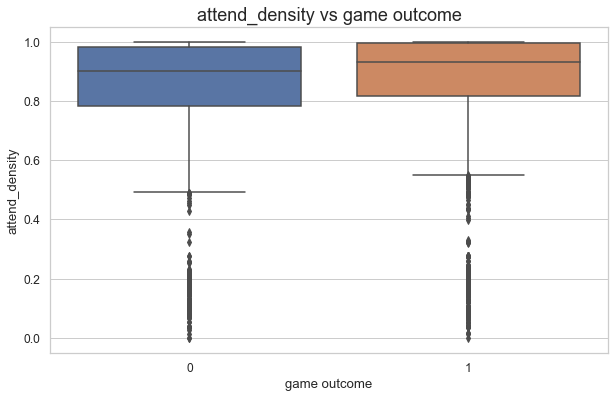

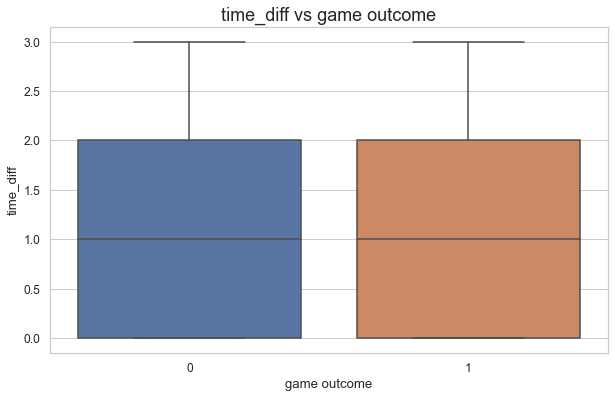

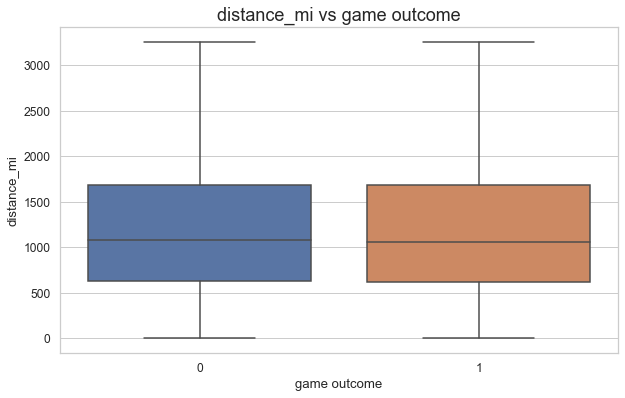

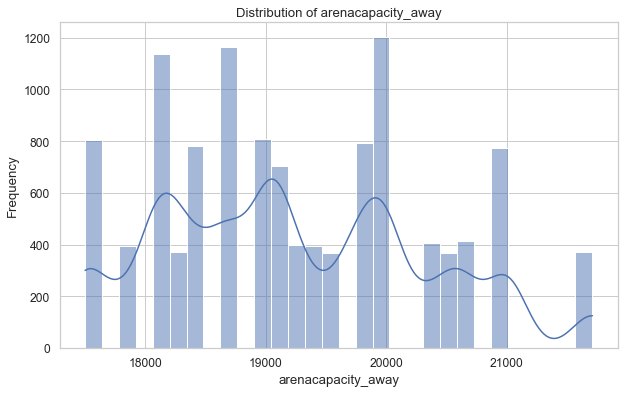

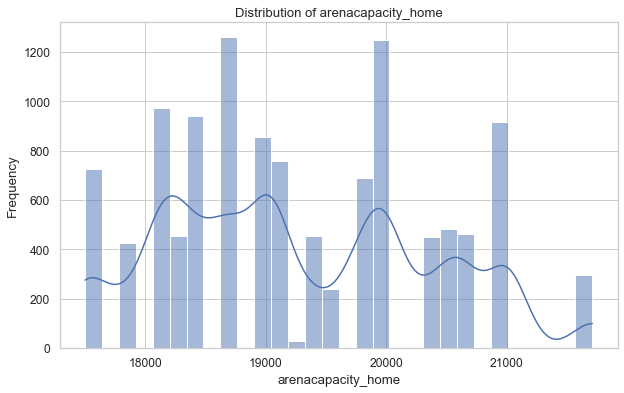

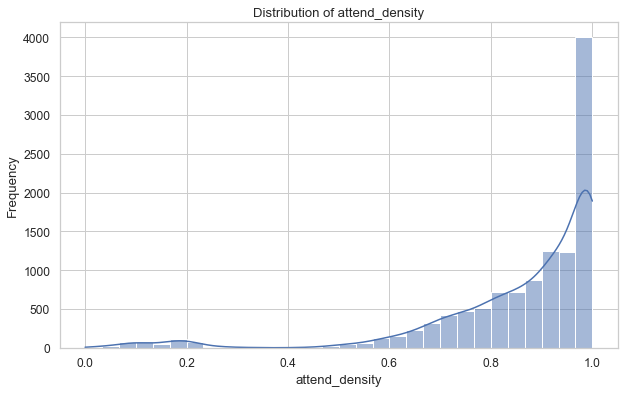

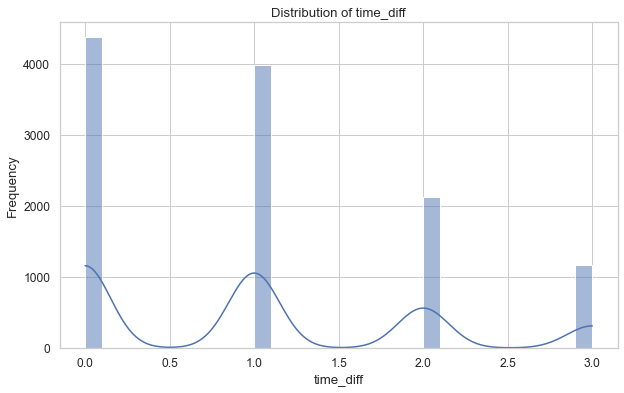

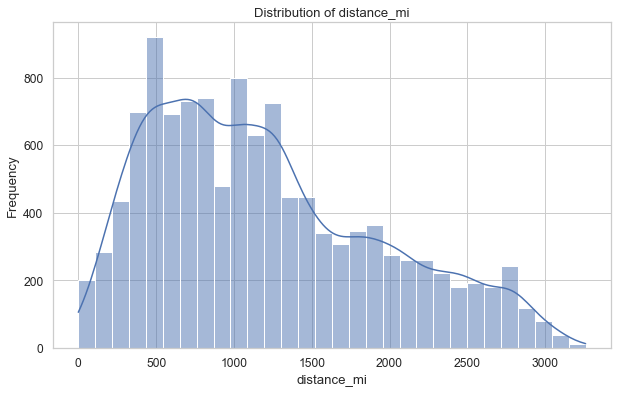

In [27]:
# 创建针对每个特征的箱型图
for feature in features:
    fig = plt.figure(figsize=(10, 6))
    sns.boxplot(x='home_advantage', y=feature, data=filtered_data)
    plt.title(f'{feature} vs game outcome', fontsize=18)
    plt.xlabel('game outcome')
    plt.ylabel(feature)
    if feature == 'attend_density':
        fig.savefig('images/attend_density_vs_game_outcome.png')  # 将图像保存为PNG文件
    plt.show()

# 创建针对每个特征的直方图
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=filtered_data, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()